# DSA - Cientista de Dados - Apache Spark

## Big Data Real-Time Analytics com Python e Spark

# Capítulo 6.6: Executando uma aplicação com PySpark

## Introdução ao PySpark

In [1]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [2]:
# sc = Spark Context
print(sc)

<SparkContext master=local[*] appName=PySparkShell>


In [3]:
print(sc.version)

3.0.3


In [4]:
# Testando o Spark e criando uma RDD
lst = [25, 90, 81, 37, 776, 3320]
testData = sc.parallelize(lst)

In [5]:
?sc.parallelize

# Pega uma coleção de elementos e trnasforma em uma RDD.
# RDD: Conversão de uma lista python para um objeto spark.
# RDD: É uma coleção de elementos. Um conjunto de dados.

In [6]:
type(testData)

pyspark.rdd.RDD

In [7]:
testData.count()

6

In [8]:
testData.collect()

[25, 90, 81, 37, 776, 3320]

RDD's são coleções distribuídas de itens. RDD's podem ser criadas a partir do Hadoop (arquivos no HDFS), através da transformação de outras RDD's, a partir de bancos de dados (relacionais e não-relacionais) ou a partir de arquivos locais.

In [9]:
# Criando uma RDD a partir de um arquivo csv
sentimentoRDD = sc.textFile(r"06.04 Cap06\sentimentos.csv")

In [10]:
type(sentimentoRDD)

pyspark.rdd.RDD

In [11]:
# Ação - Contando o número de registros
sentimentoRDD.count()

100

In [12]:
# Listando os 5 primeiros registros
sentimentoRDD.take(5)

['positivo,Esse livro é incrível.',
 'positivo,Um dos melhores livros que eu já li.',
 'positivo,um dos melhores livros que eu já li',
 'positivo,Acho que ele tem um conteúdo que vai além do que está em sua descrição.',
 'positivo,O Sol é para todos é profundo e emocionante']

In [13]:
# Transformando os dados - transformação para letras maiúsculas
transfRDD = sentimentoRDD.map(lambda x : x.upper())
transfRDD.take(5)

['POSITIVO,ESSE LIVRO É INCRÍVEL.',
 'POSITIVO,UM DOS MELHORES LIVROS QUE EU JÁ LI.',
 'POSITIVO,UM DOS MELHORES LIVROS QUE EU JÁ LI',
 'POSITIVO,ACHO QUE ELE TEM UM CONTEÚDO QUE VAI ALÉM DO QUE ESTÁ EM SUA DESCRIÇÃO.',
 'POSITIVO,O SOL É PARA TODOS É PROFUNDO E EMOCIONANTE']

In [14]:
sentimentoRDD.take(5)

['positivo,Esse livro é incrível.',
 'positivo,Um dos melhores livros que eu já li.',
 'positivo,um dos melhores livros que eu já li',
 'positivo,Acho que ele tem um conteúdo que vai além do que está em sua descrição.',
 'positivo,O Sol é para todos é profundo e emocionante']

In [15]:
arquivo = sc.textFile(r"06.04 Cap06\sentimentos.csv")

In [16]:
type(arquivo)

pyspark.rdd.RDD

In [17]:
arquivo.count()

100

In [18]:
arquivo.first()

'positivo,Esse livro é incrível.'

In [19]:
linhasComSol = arquivo.filter(lambda line: "Sol" in line)

In [20]:
type(linhasComSol)

pyspark.rdd.PipelinedRDD

In [21]:
linhasComSol.count()

3

Primeiro a função map() determina o comprimento de cada linha do arquivo, criando uma RDD. A função reduce() é chamada para encontrar a linha com maior número de caracteres. O argumento para as funções map() e reduce() são funções anônimas criadas com lambda (da linguagem Python).

In [22]:
arquivo.map(lambda line: len(line.split())).reduce(lambda a, b: a if (a > b) else b)

27

Esta linha pode ser reescrita da seguinte forma:

In [23]:
def max(a, b):
    if a > b:
        return a
    else:
        return b

arquivo.map(lambda line: len(line.split())).reduce(max)

27

## Operação de MapReduce

As operações de MapReduce foram popularizadas pelo Hadoop e podem ser feitas com Spark até 100x mais rápido.

In [24]:
contaPalavras = arquivo.flatMap(lambda line: line.split()).map(lambda palavra: (palavra, 1)).reduceByKey(lambda a, b: a+b)

In [25]:
contaPalavras.collect()

[('livro', 5),
 ('que', 13),
 ('li.', 4),
 ('positivo,um', 3),
 ('li', 1),
 ('positivo,Acho', 1),
 ('tem', 1),
 ('um', 3),
 ('vai', 1),
 ('do', 2),
 ('em', 1),
 ('descrição.', 1),
 ('positivo,O', 2),
 ('para', 5),
 ('todos', 4),
 ('positivo,Me', 1),
 ('este', 1),
 ('livro,', 1),
 ('antigo', 1),
 ('uma', 4),
 ('história', 1),
 ('antiga', 1),
 ('positivo,The', 6),
 ('Da', 38),
 ('Vinci', 45),
 ('Code', 24),
 ('is', 17),
 ('good', 3),
 ('movie...', 1),
 ('thought', 2),
 ('was', 4),
 ('pretty', 1),
 ('book.', 4),
 ('realmente', 1),
 ('deveria', 1),
 ('todas', 1),
 ('as', 1),
 ('pessoas.', 1),
 ('an', 6),
 ('*', 2),
 ('book', 2),
 ('turn', 1),
 ('positivo,Harper', 1),
 ('aborda', 1),
 ('muito', 3),
 ('polêmicos,', 1),
 ('como', 1),
 ('Bullying,', 1),
 ('olhos', 1),
 ('inocentes', 1),
 ('positivo,i', 4),
 ('love', 6),
 ('da', 13),
 ('code....', 1),
 ('loved', 5),
 ('code..', 2),
 ('VINCI', 4),
 ('BEAUTIFUL', 1),
 ('positivo,THE', 1),
 ('slash', 1),
 ('race.', 1),
 ('positivo,Hey', 1),
 ('The

Acesse o monitoramento do Spark em: http://localhost:4040/

# Capítulo 6.12: Spark - Transformações

## Transformações

In [26]:
# Criando uma lista em Python
lista1 = [124, 901, 652, 102, 397]

In [27]:
type(lista1)

list

In [28]:
# Carregando dados de uma coleção - Convertendo em RDD
lstRDD = sc.parallelize(lista1)

In [29]:
type(lstRDD)

pyspark.rdd.RDD

In [30]:
# Retornando os dados do RDD
lstRDD.collect()

[124, 901, 652, 102, 397]

In [31]:
# Contar quantos elementos tem no RDD
lstRDD.count()

5

In [32]:
# Carregando um arquivo e criando um RDD. 
autoDataRDD = sc.textFile(r"06.04 Cap06\carros.csv")

In [33]:
type(autoDataRDD)

pyspark.rdd.RDD

In [34]:
# Operação de Ação - Retornando a primeira linha
autoDataRDD.first()

'MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE'

In [35]:
# Retornando as 5 primeiras linhas do RDD
autoDataRDD.take(5)

['MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE',
 'subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118',
 'chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151',
 'mazda,gas,std,two,hatchback,fwd,four,68,5000,30,31,5195',
 'toyota,gas,std,two,hatchback,fwd,four,62,4800,35,39,5348']

In [36]:
# Cada ação gera um novo processo de computação dos dados. 
# Mas podemos persistir os dados em cache para que ele possa ser usado por outras ações, sem a necessidade 
# de nova computação.
autoDataRDD.cache()

06.04 Cap06\carros.csv MapPartitionsRDD[23] at textFile at NativeMethodAccessorImpl.java:0

In [37]:
# Imprimindo todas as linhas do RDD
for line in autoDataRDD.collect():
    print(line)

MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE
subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118
chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151
mazda,gas,std,two,hatchback,fwd,four,68,5000,30,31,5195
toyota,gas,std,two,hatchback,fwd,four,62,4800,35,39,5348
mitsubishi,gas,std,two,hatchback,fwd,four,68,5500,37,41,5389
honda,gas,std,two,hatchback,fwd,four,60,5500,38,42,5399
nissan,gas,std,two,sedan,fwd,four,69,5200,31,37,5499
dodge,gas,std,two,hatchback,fwd,four,68,5500,37,41,5572
plymouth,gas,std,two,hatchback,fwd,four,68,5500,37,41,5572
mazda,gas,std,two,hatchback,fwd,four,68,5000,31,38,6095
mitsubishi,gas,std,two,hatchback,fwd,four,68,5500,31,38,6189
dodge,gas,std,four,hatchback,fwd,four,68,5500,31,38,6229
plymouth,gas,std,four,hatchback,fwd,four,68,5500,31,38,6229
chevrolet,gas,std,two,hatchback,fwd,four,70,5400,38,43,6295
toyota,gas,std,two,hatchback,fwd,four,62,4800,31,38,6338
dodge,gas,std,two,hatchback,fwd,four,68,5500,31,38,6377

In [38]:
# Map() e criação de um novo RDD - Transformação - Lazy Evaluation
tsvData = autoDataRDD.map(lambda x : x.replace(",","\t"))
tsvData.take(5)

['MAKE\tFUELTYPE\tASPIRE\tDOORS\tBODY\tDRIVE\tCYLINDERS\tHP\tRPM\tMPG-CITY\tMPG-HWY\tPRICE',
 'subaru\tgas\tstd\ttwo\thatchback\tfwd\tfour\t69\t4900\t31\t36\t5118',
 'chevrolet\tgas\tstd\ttwo\thatchback\tfwd\tthree\t48\t5100\t47\t53\t5151',
 'mazda\tgas\tstd\ttwo\thatchback\tfwd\tfour\t68\t5000\t30\t31\t5195',
 'toyota\tgas\tstd\ttwo\thatchback\tfwd\tfour\t62\t4800\t35\t39\t5348']

In [39]:
autoDataRDD.first()

'MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE'

In [40]:
# Filter() e criação de um novo RDD - Transformação - Lazy Evaluation
toyotaData = autoDataRDD.filter(lambda x: "toyota" in x)

In [41]:
# Ação
toyotaData.count()

32

In [42]:
# Ação
toyotaData.take(20)

['toyota,gas,std,two,hatchback,fwd,four,62,4800,35,39,5348',
 'toyota,gas,std,two,hatchback,fwd,four,62,4800,31,38,6338',
 'toyota,gas,std,four,hatchback,fwd,four,62,4800,31,38,6488',
 'toyota,gas,std,four,wagon,fwd,four,62,4800,31,37,6918',
 'toyota,gas,std,four,sedan,fwd,four,70,4800,30,37,6938',
 'toyota,gas,std,four,hatchback,fwd,four,70,4800,30,37,7198',
 'toyota,gas,std,four,sedan,fwd,four,70,4800,38,47,7738',
 'toyota,diesel,std,four,hatchback,fwd,four,56,4500,38,47,7788',
 'toyota,gas,std,four,wagon,4wd,four,62,4800,27,32,7898',
 'toyota,diesel,std,four,sedan,fwd,four,56,4500,34,36,7898',
 'toyota,gas,std,two,sedan,rwd,four,70,4800,29,34,8058',
 'toyota,gas,std,two,hatchback,rwd,four,70,4800,29,34,8238',
 'toyota,gas,std,four,hatchback,fwd,four,70,4800,28,34,8358',
 'toyota,gas,std,two,hardtop,rwd,four,116,4800,24,30,8449',
 'toyota,gas,std,four,wagon,4wd,four,62,4800,27,32,8778',
 'toyota,gas,std,four,sedan,fwd,four,92,4200,29,34,8948',
 'toyota,gas,std,four,sedan,fwd,four,70,

In [43]:
# Pode salvar o conjunto de dados, o RDD. 
# Nesse caso, o Spark solicita os dados ao processo Master e então gera um arquivo de saída.
savedRDD = open(r"06.04 Cap06\carros_v2.csv","w")
savedRDD.write("\n".join(autoDataRDD.collect()))
savedRDD.close()

# Capítulo 6.13: Operações Set, Outer Join e Distinct

## Operações Set

In [44]:
# Set operations
palavras1 = sc.parallelize(["Big Data","Data Science","Analytics","Visualization"])
palavras2 = sc.parallelize(["Big Data","R","Python","Scala"])

In [45]:
# União
for unions in palavras1.union(palavras2).distinct().collect():
    print(unions)
    
# .distinct(): Valroes únicos
# .collect(): Imprimir na tela

Data Science
R
Visualization
Scala
Big Data
Python
Analytics


In [46]:
# Interseção
for intersects in palavras1.intersection(palavras2).collect():
    print(intersects)
    
# .intersection(): Valores que aparecem em ambos os conjuntos

Big Data


In [47]:
rdd01 = sc.parallelize(range(1,10))
rdd02 = sc.parallelize(range(10,21))
rdd01.union(rdd02).collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [48]:
rdd01 = sc.parallelize(range(1,10))
rdd02 = sc.parallelize(range(5,15))
rdd01.intersection(rdd02).collect()

[8, 9, 5, 6, 7]

## Left/Right Outer Join

In [53]:
names1 = sc.parallelize(("banana", "uva", "laranja")).map(lambda a: (a, 1))
names2 = sc.parallelize(("laranja", "abacaxi", "manga")).map(lambda a: (a, 1))
names1.join(names2).collect()

[('laranja', (1, 1))]

In [54]:
names1.leftOuterJoin(names2).collect()

[('uva', (1, None)), ('banana', (1, None)), ('laranja', (1, 1))]

In [55]:
names1.rightOuterJoin(names2).collect()

[('manga', (None, 1)), ('laranja', (1, 1)), ('abacaxi', (None, 1))]

## Distinct

In [56]:
# Distinct
lista1 = [124, 901, 652, 102, 397, 124, 901, 652]
lstRDD = sc.parallelize(lista1) # transforma lista em RDD
for numbData in lstRDD.distinct().collect(): # Valores únicos e imprime
    print(numbData)

124
652
901
397
102


## Transformação e Limpeza

In [57]:
# Transformação e Limpeza
def LimpaRDD(autoStr) :
    if isinstance(autoStr, int) :
        return autoStr
    attList = autoStr.split(",")
    
    # Converte o número de portas para um num
    if attList[3] == "two" :
         attList[3] = "2"
    else:
         attList[3] = "4"
    
    # Convert o modelo do carro para uppercase
    attList[5] = attList[4].upper()
    return ",".join(attList)

In [58]:
RDD_limpo = autoDataRDD.map(LimpaRDD)
RDD_limpo.collect()

['MAKE,FUELTYPE,ASPIRE,4,BODY,BODY,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE',
 'subaru,gas,std,2,hatchback,HATCHBACK,four,69,4900,31,36,5118',
 'chevrolet,gas,std,2,hatchback,HATCHBACK,three,48,5100,47,53,5151',
 'mazda,gas,std,2,hatchback,HATCHBACK,four,68,5000,30,31,5195',
 'toyota,gas,std,2,hatchback,HATCHBACK,four,62,4800,35,39,5348',
 'mitsubishi,gas,std,2,hatchback,HATCHBACK,four,68,5500,37,41,5389',
 'honda,gas,std,2,hatchback,HATCHBACK,four,60,5500,38,42,5399',
 'nissan,gas,std,2,sedan,SEDAN,four,69,5200,31,37,5499',
 'dodge,gas,std,2,hatchback,HATCHBACK,four,68,5500,37,41,5572',
 'plymouth,gas,std,2,hatchback,HATCHBACK,four,68,5500,37,41,5572',
 'mazda,gas,std,2,hatchback,HATCHBACK,four,68,5000,31,38,6095',
 'mitsubishi,gas,std,2,hatchback,HATCHBACK,four,68,5500,31,38,6189',
 'dodge,gas,std,4,hatchback,HATCHBACK,four,68,5500,31,38,6229',
 'plymouth,gas,std,4,hatchback,HATCHBACK,four,68,5500,31,38,6229',
 'chevrolet,gas,std,2,hatchback,HATCHBACK,four,70,5400,38,43,6295',
 'toyot

# Capítulo 6.15: Ações

## Ações

In [59]:
# reduce() - soma de valores
lista2 = [124, 901, 652, 102, 397, 124, 901, 652]
lstRDD = sc.parallelize(lista2)
lstRDD.collect()
lstRDD.reduce(lambda x,y: x + y)

3853

In [60]:
# Encontrando a linha com menor número de caracteres
autoDataRDD.reduce(lambda x,y: x if len(x) < len(y) else y)

'bmw,gas,std,two,sedan,rwd,six,182,5400,16,22,41315'

In [61]:
# Criando uma função para redução
def getMPG(autoStr) :
    if isinstance(autoStr, int) :
        return autoStr
    attList = autoStr.split(",")
    if attList[9].isdigit() :
        return int(attList[9])
    else:
        return 0

In [62]:
# Encontrando a média de MPG para todos os carros
autoDataRDD.reduce(lambda x,y : getMPG(x) + getMPG(y)) / (autoDataRDD.count() -1)

25.15228426395939

In [63]:
teams = sc.parallelize(("Flamengo", "Vasco", "Botafogo", "Fluminense", "Palmeiras", "Bahia"))
teams.takeSample(True, 3)

['Botafogo', 'Vasco', 'Vasco']

In [64]:
teams = sc.parallelize(("Flamengo", "Vasco", "Botafogo", "Fluminense", "Palmeiras", "Bahia", "Bahia", "Vasco"))
teams.map(lambda k: (k,1)).countByKey().items()

dict_items([('Flamengo', 1), ('Vasco', 2), ('Botafogo', 1), ('Fluminense', 1), ('Palmeiras', 1), ('Bahia', 2)])

In [ ]:
autoDataRDD.saveAsTextFile("autoDataRDD.txt")

# Capítulo 6.16: Analisando Dados do Uber com Spark

## Analisando Dados do Uber

Dataset: https://github.com/fivethirtyeight/uber-tlc-foil-response

In [65]:
from pandas import read_csv

In [66]:
# Versão do Apache Spark
sc.version

'3.0.3'

In [67]:
# Criando um objeto Pandas
uberFile = read_csv(r"06.04 Cap06\uber.csv")

In [68]:
type(uberFile)

pandas.core.frame.DataFrame

In [69]:
# Visualizando as primeiras linhas
uberFile.head(10)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
5,B02598,1/1/2015,870,6903
6,B02598,1/2/2015,785,4768
7,B02617,1/2/2015,1137,7065
8,B02512,1/2/2015,175,875
9,B02682,1/2/2015,890,5506


In [70]:
# Tranformando o dataframe (Pandas) em um Dataframe (Spark)
uberDF = sqlContext.createDataFrame(uberFile)

In [71]:
type(uberDF)

pyspark.sql.dataframe.DataFrame

In [72]:
# Criando o RDD a partir dr arquivo csv
uberRDD = sc.textFile(r"06.04 Cap06\uber.csv")

In [73]:
type(uberRDD)

pyspark.rdd.RDD

In [74]:
uberRDD.count()

355

In [75]:
uberRDD.first()

'dispatching_base_number,date,active_vehicles,trips'

In [76]:
# Dividindo o arquivo em colunas, separadas pelo caracter ",""
uberLinhas = uberRDD.map(lambda line: line.split(","))

In [77]:
type(uberLinhas)

pyspark.rdd.PipelinedRDD

In [78]:
uberLinhas.map(lambda linha: linha[0]).distinct().count()

7

In [79]:
uberLinhas.map(lambda linha: linha[0]).distinct().collect()

['dispatching_base_number',
 'B02765',
 'B02682',
 'B02598',
 'B02512',
 'B02764',
 'B02617']

In [80]:
uberLinhas.filter(lambda linha: "B02617" in linha).count()

59

In [81]:
b02617_RDD = uberLinhas.filter(lambda linha: "B02617" in linha)

In [82]:
b02617_RDD.filter(lambda linha: int(linha[3]) > 15000).count()

6

In [83]:
b02617_RDD.filter(lambda linha: int(linha[3]) > 15000).collect()

[['B02617', '1/31/2015', '1394', '15756'],
 ['B02617', '2/6/2015', '1526', '15417'],
 ['B02617', '2/13/2015', '1590', '16996'],
 ['B02617', '2/14/2015', '1486', '16999'],
 ['B02617', '2/20/2015', '1574', '16856'],
 ['B02617', '2/21/2015', '1443', '16098']]

In [84]:
uberRDD2 = sc.textFile(r"06.04 Cap06\uber.csv").filter(lambda line: "base" not in line).map(lambda line:line.split(","))

In [85]:
uberRDD2.map(lambda kp: (kp[0], int(kp[3])) ).reduceByKey(lambda k,v: k + v).collect()

[('B02765', 193670),
 ('B02682', 662509),
 ('B02598', 540791),
 ('B02512', 93786),
 ('B02764', 1914449),
 ('B02617', 725025)]

In [ ]:
uberRDD2.map(lambda kp: (kp[0], int(kp[3])) ).reduceByKey(lambda k,v: k + v).takeOrdered(10, key = lambda x: -x[1])

# Spark SQL

# Capítulo 7.5: SQL com RDD

O Spark SQL é usado para acessar dados estruturados com Spark.

#### Acesse http://localhost:4040 sempre que quiser acompanhar a execução dos jobs. 
#### Pacotes adicionais podem ser encontrados aqui: https://spark-packages.org/ (usaremos um destes pacotes para conexão com o MongoDB).

## Spark SQL e RDD's

In [86]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import Row

In [87]:
print(sc)

<SparkContext master=local[*] appName=PySparkShell>


In [88]:
# Spark Session - usada quando se trabalha com Dataframes no Spark
spSession = SparkSession.builder.master("local").appName("DSA-SparkSQL").config("spark.some.config.option", "some-value").getOrCreate()

In [89]:
# Criando o SQL Context para trabalhar com Spark SQL
sqlContext = SQLContext(sc)

In [90]:
# Importando o arquivo e criando um RDD
linhasRDD1 = sc.textFile(r"07.01.01 Arquivos Cap07\carros.csv")

In [91]:
linhasRDD1.count()

198

In [92]:
# Removendo a primeira linha - Transformação 1
linhasRDD2 = linhasRDD1.filter(lambda x: "FUELTYPE" not in x)

In [93]:
linhasRDD2.count()

197

In [94]:
# Dividindo o conjunto de dados em colunas - Transformação 2
linhasRDD3 = linhasRDD2.map(lambda line: line.split(","))

In [95]:
# Dividindo o conjunto de dados em colunas - Transformação 3
linhasRDD4 = linhasRDD3.map(lambda p: Row(make = p[0], body = p[4], hp = int(p[7])))

In [96]:
?Row

# Transforma cada linha em um objeto diferente.
# Agora pode ser distribuído em diferentes partições, cluesters.

In [97]:
linhasRDD4.collect()

[Row(make='subaru', body='hatchback', hp=69),
 Row(make='chevrolet', body='hatchback', hp=48),
 Row(make='mazda', body='hatchback', hp=68),
 Row(make='toyota', body='hatchback', hp=62),
 Row(make='mitsubishi', body='hatchback', hp=68),
 Row(make='honda', body='hatchback', hp=60),
 Row(make='nissan', body='sedan', hp=69),
 Row(make='dodge', body='hatchback', hp=68),
 Row(make='plymouth', body='hatchback', hp=68),
 Row(make='mazda', body='hatchback', hp=68),
 Row(make='mitsubishi', body='hatchback', hp=68),
 Row(make='dodge', body='hatchback', hp=68),
 Row(make='plymouth', body='hatchback', hp=68),
 Row(make='chevrolet', body='hatchback', hp=70),
 Row(make='toyota', body='hatchback', hp=62),
 Row(make='dodge', body='hatchback', hp=68),
 Row(make='honda', body='hatchback', hp=58),
 Row(make='toyota', body='hatchback', hp=62),
 Row(make='honda', body='hatchback', hp=76),
 Row(make='chevrolet', body='sedan', hp=70),
 Row(make='nissan', body='sedan', hp=69),
 Row(make='mitsubishi', body='hat

In [98]:
# Criando um dataframe a partir do RDD
linhasDF = spSession.createDataFrame(linhasRDD4)

In [99]:
linhasDF.show()

+----------+---------+---+
|      make|     body| hp|
+----------+---------+---+
|    subaru|hatchback| 69|
| chevrolet|hatchback| 48|
|     mazda|hatchback| 68|
|    toyota|hatchback| 62|
|mitsubishi|hatchback| 68|
|     honda|hatchback| 60|
|    nissan|    sedan| 69|
|     dodge|hatchback| 68|
|  plymouth|hatchback| 68|
|     mazda|hatchback| 68|
|mitsubishi|hatchback| 68|
|     dodge|hatchback| 68|
|  plymouth|hatchback| 68|
| chevrolet|hatchback| 70|
|    toyota|hatchback| 62|
|     dodge|hatchback| 68|
|     honda|hatchback| 58|
|    toyota|hatchback| 62|
|     honda|hatchback| 76|
| chevrolet|    sedan| 70|
+----------+---------+---+
only showing top 20 rows



In [100]:
type(linhasDF)

pyspark.sql.dataframe.DataFrame

In [101]:
linhasDF.select("*").show()

+----------+---------+---+
|      make|     body| hp|
+----------+---------+---+
|    subaru|hatchback| 69|
| chevrolet|hatchback| 48|
|     mazda|hatchback| 68|
|    toyota|hatchback| 62|
|mitsubishi|hatchback| 68|
|     honda|hatchback| 60|
|    nissan|    sedan| 69|
|     dodge|hatchback| 68|
|  plymouth|hatchback| 68|
|     mazda|hatchback| 68|
|mitsubishi|hatchback| 68|
|     dodge|hatchback| 68|
|  plymouth|hatchback| 68|
| chevrolet|hatchback| 70|
|    toyota|hatchback| 62|
|     dodge|hatchback| 68|
|     honda|hatchback| 58|
|    toyota|hatchback| 62|
|     honda|hatchback| 76|
| chevrolet|    sedan| 70|
+----------+---------+---+
only showing top 20 rows



In [102]:
linhasDF.orderBy("make").show()

+-----------+-----------+---+
|       make|       body| hp|
+-----------+-----------+---+
|alfa-romero|  hatchback|154|
|alfa-romero|convertible|111|
|alfa-romero|convertible|111|
|       audi|      sedan|110|
|       audi|      wagon|110|
|       audi|      sedan|140|
|       audi|      sedan|110|
|       audi|      sedan|115|
|       audi|      sedan|102|
|        bmw|      sedan|121|
|        bmw|      sedan|121|
|        bmw|      sedan|182|
|        bmw|      sedan|182|
|        bmw|      sedan|101|
|        bmw|      sedan|182|
|        bmw|      sedan|121|
|        bmw|      sedan|101|
|  chevrolet|  hatchback| 70|
|  chevrolet|      sedan| 70|
|  chevrolet|  hatchback| 48|
+-----------+-----------+---+
only showing top 20 rows



In [103]:
# Registrando o dataframe como uma Temporary Table
linhasDF.createOrReplaceTempView("linhasTB")

In [104]:
# Executando queries SQL ANSI
spSession.sql("select * from linhasTB where make = 'nissan'").show()

+------+---------+---+
|  make|     body| hp|
+------+---------+---+
|nissan|    sedan| 69|
|nissan|    sedan| 69|
|nissan|    sedan| 69|
|nissan|    sedan| 55|
|nissan|    sedan| 69|
|nissan|    wagon| 69|
|nissan|    sedan| 69|
|nissan|hatchback| 69|
|nissan|    wagon| 69|
|nissan|  hardtop| 69|
|nissan|hatchback| 97|
|nissan|    sedan| 97|
|nissan|    sedan|152|
|nissan|    sedan|152|
|nissan|    wagon|152|
|nissan|hatchback|160|
|nissan|hatchback|160|
|nissan|hatchback|200|
+------+---------+---+



In [105]:
# Executando queries SQL ANSI
spSession.sql("select make, body, avg(hp) from linhasTB group by make, body").show()

+-------------+-----------+-----------------+
|         make|       body|          avg(hp)|
+-------------+-----------+-----------------+
|       nissan|      wagon|96.66666666666667|
|       subaru|      sedan|             90.2|
|     plymouth|      sedan|             68.0|
|        dodge|  hatchback|             90.2|
|       nissan|      sedan|             89.0|
|        honda|      sedan|             89.8|
|   mitsubishi|  hatchback|            105.0|
|        mazda|      sedan|82.66666666666667|
|  alfa-romero|convertible|            111.0|
|mercedes-benz|convertible|            155.0|
|     plymouth|      wagon|             88.0|
|mercedes-benz|      wagon|            123.0|
|        isuzu|  hatchback|             90.0|
|       toyota|convertible|            116.0|
|        mazda|  hatchback|             89.4|
|    chevrolet|      sedan|             70.0|
|      mercury|  hatchback|            175.0|
|      porsche|  hatchback|            143.0|
|        honda|      wagon|       

# Capítulo 7.6: Spark com Arquivos CSV

## Spark SQL e Arquivos CSV

In [106]:
carrosDF = spSession.read.csv(r"07.01.01 Arquivos Cap07\carros.csv", header = True)

In [107]:
type(carrosDF)

pyspark.sql.dataframe.DataFrame

In [108]:
carrosDF.show()

+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|      MAKE|FUELTYPE|ASPIRE|DOORS|     BODY|DRIVE|CYLINDERS| HP| RPM|MPG-CITY|MPG-HWY|PRICE|
+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|    subaru|     gas|   std|  two|hatchback|  fwd|     four| 69|4900|      31|     36| 5118|
| chevrolet|     gas|   std|  two|hatchback|  fwd|    three| 48|5100|      47|     53| 5151|
|     mazda|     gas|   std|  two|hatchback|  fwd|     four| 68|5000|      30|     31| 5195|
|    toyota|     gas|   std|  two|hatchback|  fwd|     four| 62|4800|      35|     39| 5348|
|mitsubishi|     gas|   std|  two|hatchback|  fwd|     four| 68|5500|      37|     41| 5389|
|     honda|     gas|   std|  two|hatchback|  fwd|     four| 60|5500|      38|     42| 5399|
|    nissan|     gas|   std|  two|    sedan|  fwd|     four| 69|5200|      31|     37| 5499|
|     dodge|     gas|   std|  two|hatchback|  fwd|     four| 68|5500| 

In [109]:
# Registrando o dataframe como uma Temporary Table
carrosDF.createOrReplaceTempView("carrosTB")

In [110]:
# Executando queries SQL ANSI
spSession.sql("select make, hp, price from carrosTB where CYLINDERS = 'three'").show()

+---------+---+-----+
|     make| hp|price|
+---------+---+-----+
|chevrolet| 48| 5151|
+---------+---+-----+



In [111]:
carrosTT = spSession.sql("select make, hp, price from carrosTB where CYLINDERS = 'three'")

In [112]:
carrosTT.show()

+---------+---+-----+
|     make| hp|price|
+---------+---+-----+
|chevrolet| 48| 5151|
+---------+---+-----+



# Capítulo 7.7: Spark Machine Learning - Clustering

## Aplicando Machine Learning

In [113]:
# Carregando o arquivo CSV e mantendo o objeto em cache
carros = sc.textFile(r"07.01.01 Arquivos Cap07\carros.csv")
carros.cache()

07.01.01 Arquivos Cap07\carros.csv MapPartitionsRDD[195] at textFile at NativeMethodAccessorImpl.java:0

In [114]:
# Remove a primeira linha (header)
primeiraLinha = carros.first()
linhas = carros.filter(lambda x: x != primeiraLinha)
linhas.count()

197

In [115]:
# Importando função row e função vectors
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
import math

In [116]:
# Convertendo para um vetor de linhas
def transformToNumeric( inputStr) :
    attList = inputStr.split(",")
    doors = 1.0 if attList[3] == "two" else 2.0
    body = 1.0 if attList[4] == "sedan" else 2.0 
       
    # Filtrando colunas não necessárias nesta etapa
    valores = Row(DOORS = doors, BODY = float(body), HP = float(attList[7]), RPM = float(attList[8]), MPG = float(attList[9]))
    return valores

In [117]:
autoMap = linhas.map(transformToNumeric)
autoMap.persist() # Persistência desse objeto em memória
autoMap.collect()

[Row(DOORS=1.0, BODY=2.0, HP=69.0, RPM=4900.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=48.0, RPM=5100.0, MPG=47.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5000.0, MPG=30.0),
 Row(DOORS=1.0, BODY=2.0, HP=62.0, RPM=4800.0, MPG=35.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=37.0),
 Row(DOORS=1.0, BODY=2.0, HP=60.0, RPM=5500.0, MPG=38.0),
 Row(DOORS=1.0, BODY=1.0, HP=69.0, RPM=5200.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=37.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=37.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5000.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=2.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=2.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=70.0, RPM=5400.0, MPG=38.0),
 Row(DOORS=1.0, BODY=2.0, HP=62.0, RPM=4800.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=58.0, RPM=4800.0, MPG=49.0),
 Row(DOORS=2.0

In [118]:
# Criando o Dataframe
carrosDf = spSession.createDataFrame(autoMap)
carrosDf.show()

+-----+----+----+------+----+
|DOORS|BODY|  HP|   RPM| MPG|
+-----+----+----+------+----+
|  1.0| 2.0|69.0|4900.0|31.0|
|  1.0| 2.0|48.0|5100.0|47.0|
|  1.0| 2.0|68.0|5000.0|30.0|
|  1.0| 2.0|62.0|4800.0|35.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|60.0|5500.0|38.0|
|  1.0| 1.0|69.0|5200.0|31.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|68.0|5000.0|31.0|
|  1.0| 2.0|68.0|5500.0|31.0|
|  2.0| 2.0|68.0|5500.0|31.0|
|  2.0| 2.0|68.0|5500.0|31.0|
|  1.0| 2.0|70.0|5400.0|38.0|
|  1.0| 2.0|62.0|4800.0|31.0|
|  1.0| 2.0|68.0|5500.0|31.0|
|  1.0| 2.0|58.0|4800.0|49.0|
|  2.0| 2.0|62.0|4800.0|31.0|
|  1.0| 2.0|76.0|6000.0|30.0|
|  2.0| 1.0|70.0|5400.0|38.0|
+-----+----+----+------+----+
only showing top 20 rows



In [119]:
# Aplicando técnicas de normalização e escala
summStats = carrosDf.describe().toPandas() # Convertendo df Spark para df Pandas
medias = summStats.iloc[1,1:5].values.tolist()
desvios_padroes = summStats.iloc[2,1:5].values.tolist()

In [120]:
# Inserindo a média e o desvio padrão em uma variável do tipo broadcast 
bcMedias = sc.broadcast(medias)
bcDesviosP = sc.broadcast(desvios_padroes)

In [121]:
def centerAndScale(inRow) :
    global bcMedias
    global bcDesviosP
    
    meanArray = bcMedias.value
    stdArray = bcDesviosP.value

    retArray = []
    for i in range(len(meanArray)):
        retArray.append( (float(inRow[i]) - float(meanArray[i])) / float(stdArray[i]) )
    return Vectors.dense(retArray)

In [122]:
# Retornando o objeto para RDD
csAuto = carrosDf.rdd.map(centerAndScale)
csAuto.collect()

[DenseVector([-1.145, 0.9337, -0.9194, -0.4532]),
 DenseVector([-1.145, 0.9337, -1.4773, -0.0375]),
 DenseVector([-1.145, 0.9337, -0.9459, -0.2453]),
 DenseVector([-1.145, 0.9337, -1.1053, -0.6611]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -1.1585, 0.7941]),
 DenseVector([-1.145, -1.0656, -0.9194, 0.1704]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -0.9459, -0.2453]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([0.869, 0.9337, -0.9459, 0.7941]),
 DenseVector([0.869, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -0.8928, 0.5862]),
 DenseVector([-1.145, 0.9337, -1.1053, -0.6611]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -1.2116, -0.6611]),
 DenseVector([0.869, 0.9337, -1.1053, -0.6611]),
 DenseVector([-1.145, 0.9337, -0.7334, 1.8335]),
 DenseVector([0.869, -1.0656, -0.8928, 0.5862]),
 DenseVector([

In [123]:
# Criando um Spark Dataframe
autoRows = csAuto.map(lambda f:Row(features = f))
autoDf = spSession.createDataFrame(autoRows)
autoDf.select("features").show(10)

+--------------------+
|            features|
+--------------------+
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
+--------------------+
only showing top 10 rows



In [124]:
# Importando o algoritmo K-Means para clusterização
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k = 3, seed = 1)
modelo = kmeans.fit(autoDf)
previsoes = modelo.transform(autoDf)
previsoes.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         0|
|[0.86895117361793...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         1|
+--------------------+----------+
only showing top 20 rows



In [125]:
# Plot dos resultados
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [126]:
def unstripData(instr) :
    return ( instr["prediction"], instr["features"][0], instr["features"][1],instr["features"][2],instr["features"][3])

In [127]:
# Organizando os dados para o Plot
unstripped = previsoes.rdd.map(unstripData)
predList = unstripped.collect()
predPd = pd.DataFrame(predList)

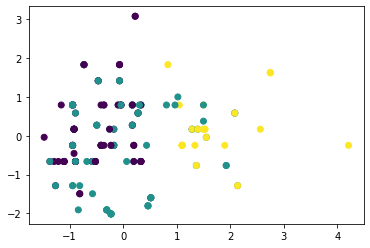

In [128]:
plt.cla()
plt.scatter(predPd[3], predPd[4], c = predPd[0])

# Capítulo 7.8: Spark SQL com arquivos JSON

## Spark SQL e Arquivos JSON

Neste site você pode validar a estrutura de um arquivo JSON: http://jsonlint.com/

In [131]:
# Importando o arquivo JSON
funcDF = spSession.read.json(r"07.01.01 Arquivos Cap07\funcionarios.json")

In [132]:
funcDF.show()

+------+-----+----------------+-------+----+
|deptid|idade|            nome|salario|sexo|
+------+-----+----------------+-------+----+
|  1000|   42|   Josias Rebelo|   7000|   m|
|  2000|   50|Mauricio Gonheim|   9500|   m|
|  1000|   36| Bruno Velasquez|   6700|   m|
|  1000|   41|  Ananda Tavares|   9300|   f|
|  2000|   34|     Carlos Maia|   5500|   m|
+------+-----+----------------+-------+----+



In [133]:
funcDF.printSchema()

root
 |-- deptid: string (nullable = true)
 |-- idade: string (nullable = true)
 |-- nome: string (nullable = true)
 |-- salario: string (nullable = true)
 |-- sexo: string (nullable = true)



In [134]:
type(funcDF)

pyspark.sql.dataframe.DataFrame

In [135]:
# Operações com Dataframe Spark SQL - select()
funcDF.select("nome").show()

+----------------+
|            nome|
+----------------+
|   Josias Rebelo|
|Mauricio Gonheim|
| Bruno Velasquez|
|  Ananda Tavares|
|     Carlos Maia|
+----------------+



In [136]:
# Operações com Dataframe Spark SQL - filter()
funcDF.filter(funcDF["idade"] == 50).show()

+------+-----+----------------+-------+----+
|deptid|idade|            nome|salario|sexo|
+------+-----+----------------+-------+----+
|  2000|   50|Mauricio Gonheim|   9500|   m|
+------+-----+----------------+-------+----+



In [137]:
# Operações com Dataframe Spark SQL - groupBy()
funcDF.groupBy("sexo").count().show()

+----+-----+
|sexo|count|
+----+-----+
|   m|    4|
|   f|    1|
+----+-----+



In [138]:
# Operações com Dataframe Spark SQL - groupBy()
funcDF.groupBy("deptid").agg({"salario": "avg", "idade": "max"}).show()

+------+----------+-----------------+
|deptid|max(idade)|     avg(salario)|
+------+----------+-----------------+
|  2000|        50|           7500.0|
|  1000|        42|7666.666666666667|
+------+----------+-----------------+



In [139]:
# Registrando o dataframe como uma Temp Table
funcDF.registerTempTable("funcTB")

In [140]:
# Executando queries SQL ANSI
spSession.sql("select deptid, max(idade), avg(salario) from funcTB group by deptid").show()

+------+----------+----------------------------+
|deptid|max(idade)|avg(CAST(salario AS DOUBLE))|
+------+----------+----------------------------+
|  2000|        50|                      7500.0|
|  1000|        42|           7666.666666666667|
+------+----------+----------------------------+



# Capítulo 7.9: Tabelas Temporárias com Spark SQL

## Temp Tables

In [141]:
# Registrando o dataframe como temp Table
funcDF.createOrReplaceTempView("funcTB")

In [142]:
spSession.sql("select * from funcTB where salario = 6700").show()

+------+-----+---------------+-------+----+
|deptid|idade|           nome|salario|sexo|
+------+-----+---------------+-------+----+
|  1000|   36|Bruno Velasquez|   6700|   m|
+------+-----+---------------+-------+----+



In [143]:
# Criando Temp Table
sqlContext.registerDataFrameAsTable(funcDF, "funcTB2")

In [144]:
# Esse objeto tabela temporária não é um objeto definido, criado no ambiente pyspark
type(funcTB2)

NameError: name 'funcTB2' is not defined

In [145]:
# Persistindo a Temp Table - Definindo o objeto
funcTB3 = spSession.table("funcTB2")

In [146]:
type(funcTB3)

pyspark.sql.dataframe.DataFrame

In [147]:
# Comparando o Dataframe com a tabela temporária criada
sorted(funcDF.collect()) == sorted(funcTB3.collect())

True

In [148]:
# Aplicando o filtro

# Data frame registrado como Temp Table
sqlContext.registerDataFrameAsTable(funcDF, "funcTB2")

# Convertendo novamente em data frame
funcTB3 = spSession.table("funcTB2")

# Aplicação da função filter
funcTB3.filter("idade = '42'").first()

Row(deptid='1000', idade='42', nome='Josias Rebelo', salario='7000', sexo='m')

In [149]:
# Drop Temp Table
sqlContext.dropTempTable("funcTB2")

# Capítulo 7.11: Spark SQL com Banco de Dados Relacionais

## Banco de Dados Relacional

Extraindo Dados do MySQL. Primeiro precisamos baixar o driver JDBC. Haverá um driver JDBC para cada banco de dados que você conectar (Oracle, SQL Server, etc...)

1- Download do Driver JDBC para o MySQL: http://dev.mysql.com/downloads/connector/j/

2- Baixar o arquivo .zip

3- Descompactar o arquivo e copiar o arquivo mysql-connector-java-5.1.39-bin.jar para a pasta /opt/Spark/jars

In [150]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [ ]:
mysql_df = spSession.read.format("jdbc").options(
    url = "jdbc:mysql://localhost/carros",
    driver = "com.mysql.jdbc.Driver",
    dbtable = "carrostb",
    user = "root",
    password = "1234").load()

In [ ]:
mysql_df.show()

In [ ]:
dataframe_mysql.registerTempTable("carrostb")

In [ ]:
spSession.sql("select * from carrostb where hp = '68'").show()

# Capítulo 7.12: Spark SQL com Banco de Dados Não Relacionais

## Banco de Dados Não-Relacional

https://spark-packages.org/package/Stratio/spark-mongodb

$SPARK_HOME/bin/pyspark --packages com.stratio.datasource:spark-mongodb_2.11:0.12.0

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
# Cria tabela temporária a partir de dados do MongoDB
spark.sql("CREATE TEMPORARY VIEW test_tb USING com.stratio.datasource.mongodb OPTIONS (host 'localhost:27017', database 'test_db', collection 'test_collection')")

In [ ]:
# select na tabela temporária criada
spark.sql("SELECT * FROM test_tb").collect()

In [ ]:
# DataFrameReader
df = spark.read.format('com.stratio.datasource.mongodb').options(host='localhost:27017', database = 'test_db', collection = 'test_collection').load()

In [ ]:
df.show()

In [ ]:
# DataFrameWriter
df.select("titulo").write.format("com.stratio.datasource.mongodb").mode('overwrite').options(host = 'localhost:27017', database = 'test_db', collection = 'test_collection').save()

In [ ]:
# DataFrameReader
dfView = spark.read.format('com.stratio.datasource.mongodb').options(host='localhost:27017', database='test_db', collection='test_collection').load()

In [ ]:
dfView.show()

# Capítulo 7.13: Pair RDD, Acumuladores, Broadcast e Partições

Acesse http://localhost:4040 sempre que quiser acompanhar a execução dos jobs

## Pares RDD (Pair RDD)

Tipo especial de RDD que armazena pares chave-valor. Útil quando é necessário armazenar dados que possuem uma chave e diversos valores (por exemplo, todas as transações de um cliente, geradas em tempo real).

#### mapValues()
#### countByKey()
#### groupByKey()
#### reduceByKey()
#### aggregateByKey()

In [151]:
# Importando arquivo csv e criando um RDD
carros = sc.textFile(r"07.01.01 Arquivos Cap07\carros.csv")

In [152]:
# Criando uma Pair RDD
carrosPairRDD = carros.map(lambda x: (x.split(",")[0], x.split(",")[7]))
carrosPairRDD.take(5)

[('MAKE', 'HP'),
 ('subaru', '69'),
 ('chevrolet', '48'),
 ('mazda', '68'),
 ('toyota', '62')]

In [153]:
# Removendo o cabeçalho
header = carrosPairRDD.first()
carrosPairRDD2 = carrosPairRDD.filter(lambda line: line != header)

In [154]:
# Encontra a média de HP por marca de carro e adiciona 1 a cada contagem
addOne = carrosPairRDD2.mapValues(lambda x: (x, 1))
addOne.collect()

[('subaru', ('69', 1)),
 ('chevrolet', ('48', 1)),
 ('mazda', ('68', 1)),
 ('toyota', ('62', 1)),
 ('mitsubishi', ('68', 1)),
 ('honda', ('60', 1)),
 ('nissan', ('69', 1)),
 ('dodge', ('68', 1)),
 ('plymouth', ('68', 1)),
 ('mazda', ('68', 1)),
 ('mitsubishi', ('68', 1)),
 ('dodge', ('68', 1)),
 ('plymouth', ('68', 1)),
 ('chevrolet', ('70', 1)),
 ('toyota', ('62', 1)),
 ('dodge', ('68', 1)),
 ('honda', ('58', 1)),
 ('toyota', ('62', 1)),
 ('honda', ('76', 1)),
 ('chevrolet', ('70', 1)),
 ('nissan', ('69', 1)),
 ('mitsubishi', ('68', 1)),
 ('dodge', ('68', 1)),
 ('plymouth', ('68', 1)),
 ('mazda', ('68', 1)),
 ('isuzu', ('78', 1)),
 ('mazda', ('68', 1)),
 ('nissan', ('69', 1)),
 ('honda', ('76', 1)),
 ('toyota', ('62', 1)),
 ('toyota', ('70', 1)),
 ('mitsubishi', ('88', 1)),
 ('subaru', ('73', 1)),
 ('nissan', ('55', 1)),
 ('subaru', ('82', 1)),
 ('honda', ('76', 1)),
 ('toyota', ('70', 1)),
 ('honda', ('76', 1)),
 ('honda', ('76', 1)),
 ('nissan', ('69', 1)),
 ('nissan', ('69', 1)),
 

In [155]:
# Aplica redução por key (reduceByKey) e conta a quantidade de fabricantes de carro, a média de HP e o nome do fabricante
fabricantes =  addOne.reduceByKey(lambda x, y: (int(x[0]) + int(y[0]), x[1] + y[1])) 
fabricantes.collect()

[('chevrolet', (188, 3)),
 ('mazda', (1390, 16)),
 ('mitsubishi', (1353, 13)),
 ('nissan', (1846, 18)),
 ('dodge', (675, 8)),
 ('plymouth', (607, 7)),
 ('saab', (760, 6)),
 ('volvo', (1408, 11)),
 ('alfa-romero', (376, 3)),
 ('mercedes-benz', (1170, 8)),
 ('jaguar', (614, 3)),
 ('subaru', (1035, 12)),
 ('toyota', (2969, 32)),
 ('honda', (1043, 13)),
 ('isuzu', (168, 2)),
 ('volkswagen', (973, 12)),
 ('peugot', (1098, 11)),
 ('audi', (687, 6)),
 ('bmw', (1111, 8)),
 ('mercury', ('175', 1)),
 ('porsche', (764, 4))]

In [156]:
# Calculando a média de HP dividindo pela contagem total
fabricantes.mapValues(lambda x: int(x[0])/int(x[1])).collect()

[('chevrolet', 62.666666666666664),
 ('mazda', 86.875),
 ('mitsubishi', 104.07692307692308),
 ('nissan', 102.55555555555556),
 ('dodge', 84.375),
 ('plymouth', 86.71428571428571),
 ('saab', 126.66666666666667),
 ('volvo', 128.0),
 ('alfa-romero', 125.33333333333333),
 ('mercedes-benz', 146.25),
 ('jaguar', 204.66666666666666),
 ('subaru', 86.25),
 ('toyota', 92.78125),
 ('honda', 80.23076923076923),
 ('isuzu', 84.0),
 ('volkswagen', 81.08333333333333),
 ('peugot', 99.81818181818181),
 ('audi', 114.5),
 ('bmw', 138.875),
 ('mercury', 175.0),
 ('porsche', 191.0)]

## Accumulators e Broadcast

O Spark faz uma cópia do código que você escreveu para processar os dados e executa essas cópias, uma por node do cluster. Qualquer variável criada no código é local ao node. O Spark gera cópias dessas variáveis locais, uma em cada node, que agem de forma independente. Mas e se precisamos que a mesma variável seja manipulada de forma única através de todo o cluster? Usamos Acumuladores e Broadcast.

Variável Broadcast - read-only, é compartilhada em todo o cluster.

Variável Accumulator - é compartilhada em todo o cluster, mas pode ser atualizada em cada node do cluster.

In [157]:
# Inicializando variáveis Accumulator
sedanCount = sc.accumulator(0)
hatchbackCount = sc.accumulator(0)

In [158]:
# Inicializando variáveis Broadcast
sedanText = sc.broadcast("sedan")
hatchbackText = sc.broadcast("hatchback")

In [159]:
def splitLines(line) :

    global sedanCount
    global hatchbackCount

    # Usa a variável Broadcast para comparar e configura o accumulator
    if sedanText.value in line:
        sedanCount +=1
    if hatchbackText.value in line:
        hatchbackCount +=1
        
    return line.split(",")

In [160]:
# Map()
splitData = carros.map(splitLines)

In [161]:
# Ação para executar a transformação (lazy evaluation)
splitData.count()
print(sedanCount, hatchbackCount)

92 67


## Partições

Sempre que criamos RDD's, esses objetos são divididos em partições e essas partições são distirbuídas através dos nodes do cluster. Por default, os RDD's são sempre particionados. Essas partições precisam ser configuradas quando se trabalha com grandes clusters.

In [162]:
fabricantes.getNumPartitions()

2

In [163]:
# Especificando o Número de Partições
collData = sc.parallelize([3,5,4,7,4], 3)
collData.cache()
collData.count()

5

In [164]:
collData.getNumPartitions()

3

In [165]:
print (sc.defaultParallelism)

4


# Spark Streaming

# Capítulo 8.1: Gerando um Streaming de Dados em Tempo Real

## Simulando um Streaming de Dados TCP/IP na porta 9898 do seu computador local

Windows: http://mobaxterm.mobatek.net/ . Clique em Start Local Terminal e depois: nc -lk 9898 

Mac/Linux: nc -lk 9898

In [ ]:
# Importando o StreamingContext
from pyspark.streaming import StreamingContext

In [ ]:
# Criando um StreamingContext com intervalo batch de 1 segundo
ssc = StreamingContext(sc, 1)

In [ ]:
# Criando um DStream que vai conectar na porta 9898 da sua máquina local
linhas = ssc.socketTextStream("localhost", 9898)

In [ ]:
type(linhas)

In [ ]:
# Divide cada linha em palavras
palavras = linhas.flatMap(lambda line: line.split(" "))

In [ ]:
type(palavras)

In [ ]:
# Conta cada palavra em cada batch
pares = palavras.map(lambda palavra: (palavra, 1))
contaPalavras = pares.reduceByKey(lambda x, y: x + y)

In [ ]:
# Imprime os 10 primeiros elementos de cada rDD gerado no DStream
contaPalavras.pprint()

In [ ]:
ssc.start()             # Inicia a coleta e processamento do stream de dados
ssc.awaitTermination()  # Aguarda a computação ser finalizada

In [ ]:
ssc.stop()

# Capítulo 8.12.01: Gerando um Streaming de Dados em Tempo Real

## Spark Streaming - Twitter

In [ ]:
# Pode ser necessário instalar esses pacotes
# !pip install requests_oauthlib
# !pip install twython
# !pip install nltk

In [1]:
# Módulos usados
from pyspark.streaming import StreamingContext
from pyspark import SparkContext
from requests_oauthlib import OAuth1Session
from operator import add
import requests_oauthlib
from time import gmtime, strftime
import requests
import time
import string
import ast
import json
#import re

In [2]:
# Pacote NLTK
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentAnalyzer
from nltk.corpus import subjectivity
from nltk.corpus import stopwords
from nltk.sentiment.util import *

In [3]:
# Frequência de update
INTERVALO_BATCH = 5

In [4]:
# Criando o StreamingContext
ssc = StreamingContext(sc, INTERVALO_BATCH)

## Treinando o Classificador de Análise de Sentimento

Uma parte essencial da criação de um algoritmo de análise de sentimento (ou qualquer algoritmo de mineração de dados) é ter um conjunto de dados abrangente ou "Corpus" para o aprendizado, bem como um conjunto de dados de teste para garantir que a precisão do seu algoritmo atende aos padrões que você espera. Isso também permitirá que você ajuste o seu algoritmo a fim de deduzir melhores (ou mais precisas) características de linguagem natural que você poderia extrair do texto e que vão contribuir para a classificação de sentimento, em vez de usar uma abordagem genérica. Tomaremos como base o dataset de treino fornecido pela Universidade de Michigan, para competições do Kaggle (https://inclass.kaggle.com/c/si650winter11).

Esse dataset contém 1,578,627 tweets classificados e cada linha é marcada como: 

### 1 para o sentimento positivo 
### 0 para o sentimento negativo 

In [5]:
# Lendo o arquivo texto e criando um RDD em memória com Spark
arquivo = sc.textFile(r"08.15-Projeto2/dataset_analise_sentimento.csv")

In [6]:
# Removendo o cabeçalho
header = arquivo.take(1)[0]
dataset = arquivo.filter(lambda line: line != header)

In [7]:
type(dataset)

pyspark.rdd.PipelinedRDD

In [8]:
# Essa função separa as colunas em cada linha, cria uma tupla e remove a pontuação.
def get_row(line):
  row = line.split(',')
  sentimento = row[1]
  tweet = row[3].strip()
  translator = str.maketrans({key: None for key in string.punctuation})
#translator = re.compile('[%s]' % re.escape(string.punctuation))
#tweet = regex.sub('', tweet)
  tweet = tweet.translate(translator)
  tweet = tweet.split(' ')
  tweet_lower = []
  for word in tweet:
    tweet_lower.append(word.lower())
  return (tweet_lower, sentimento)

In [9]:
# Aplcia a função a cada linha do dataset
dataset_treino = dataset.map(lambda line: get_row(line))

In [10]:
# Cria um objeto SentimentAnalyzer 
sentiment_analyzer = SentimentAnalyzer()

In [11]:
# Certifique-se de ter espaço em disco - Aproximadamente 5GB
# https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
# nltk.download()
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Ao instalar tudo, aparece a seguinte tela de navegação:

from IPython.display import Image
Image(url = r'08.15-Projeto2\ntlkdata.png')

In [13]:
# Obtém a lista de stopwords em Inglês 
stopwords_all = []
for word in stopwords.words('english'):
  stopwords_all.append(word)
  stopwords_all.append(word + '_NEG')

In [14]:
# Obtém 10.000 tweets do dataset de treino e retorna todas as palavras que não são stopwords
dataset_treino_amostra = dataset_treino.take(10000)

In [15]:
all_words_neg = sentiment_analyzer.all_words([mark_negation(doc) for doc in dataset_treino_amostra])
all_words_neg_nostops = [x for x in all_words_neg if x not in stopwords_all]

In [16]:
# Cria um unigram e extrai as features
unigram_feats = sentiment_analyzer.unigram_word_feats(all_words_neg_nostops, top_n = 200)
sentiment_analyzer.add_feat_extractor(extract_unigram_feats, unigrams = unigram_feats)
training_set = sentiment_analyzer.apply_features(dataset_treino_amostra)

In [17]:
type(training_set)

nltk.collections.LazyMap

In [18]:
# Treinar o modelo
trainer = NaiveBayesClassifier.train
classifier = sentiment_analyzer.train(trainer, training_set)

Training classifier


In [19]:
# Testa o classificador em algumas sentenças
test_sentence1 = [(['this', 'program', 'is', 'bad'], '')]
test_sentence2 = [(['tough', 'day', 'at', 'work', 'today'], '')]
test_sentence3 = [(['good', 'wonderful', 'amazing', 'awesome'], '')]
test_set = sentiment_analyzer.apply_features(test_sentence1)
test_set2 = sentiment_analyzer.apply_features(test_sentence2)
test_set3 = sentiment_analyzer.apply_features(test_sentence3)

In [20]:
# Autenticação do Twitter 
consumer_key = "apaopGZ2zvfnQPUEu4Dm6OhSs"
consumer_secret = "sYTenLWQaUxAHlZshizX8ERbjmtvlMvCwUxM9Z1m1prTIrSGNl"
access_token = "709905344026320896-s4U8M6rCMDz4CqMRMV2CwBJu8KFKfZG"
access_token_secret = "Jg8WCL0AZFszLXynsDXOSMcHlynKYThGh4UO8nSu1Kokh"

In [21]:
# Especifica a URL termo de busca
search_term = 'Trump'
sample_url = 'https://stream.twitter.com/1.1/statuses/sample.json'
filter_url = 'https://stream.twitter.com/1.1/statuses/filter.json?track='+search_term

In [22]:
# Criando o objeto de atutenticação para o Twitter
auth = requests_oauthlib.OAuth1(consumer_key, consumer_secret, access_token, access_token_secret)

In [23]:
# Configurando o Stream
rdd = ssc.sparkContext.parallelize([0])
stream = ssc.queueStream([], default = rdd)

In [24]:
type(stream)

pyspark.streaming.dstream.DStream

In [25]:
# Total de tweets por update
NUM_TWEETS = 500 

In [26]:
# Essa função conecta ao Twitter e retorna um número específico de Tweets (NUM_TWEETS)
def tfunc(t, rdd):
  return rdd.flatMap(lambda x: stream_twitter_data())

# Função GET conecta a uma url e retorna dados
def stream_twitter_data():
  response = requests.get(filter_url, auth = auth, stream = True)
  print(filter_url, response)
  count = 0
  for line in response.iter_lines():
    try:
      if count > NUM_TWEETS:
        break
      post = json.loads(line.decode('utf-8'))
      contents = [post['text']]
      count += 1
      yield str(contents)
    except:
      result = False

In [27]:
stream = stream.transform(tfunc)

In [28]:
coord_stream = stream.map(lambda line: ast.literal_eval(line))

In [29]:
# Essa função classifica os tweets, aplicando as features do modelo criado anteriormente
def classifica_tweet(tweet):
  sentence = [(tweet, '')]
  test_set = sentiment_analyzer.apply_features(sentence)
  print(tweet, classifier.classify(test_set[0][0]))
  return(tweet, classifier.classify(test_set[0][0]))

In [30]:
# Essa função retorna o texto do Twitter e remove a pontuação
def get_tweet_text(rdd):
  for line in rdd:
    tweet = line.strip()
    translator = str.maketrans({key: None for key in string.punctuation})
    tweet = tweet.translate(translator)
    tweet = tweet.split(' ')
    tweet_lower = []
    for word in tweet:
      tweet_lower.append(word.lower())
    return(classifica_tweet(tweet_lower))

In [31]:
# Cria uma lista vazia para os resultados
resultados = []

In [32]:
# Essa função salva o resultado dos batches de Tweets junto com o timestamp
def output_rdd(rdd):
  global resultados
  pairs = rdd.map(lambda x: (get_tweet_text(x)[1],1))
  counts = pairs.reduceByKey(add)
  output = []
  for count in counts.collect():
    output.append(count)
  result = [time.strftime("%I:%M:%S"), output]
  resultados.append(result)
  print(result)

In [33]:
# A função foreachRDD() aplica uma função a cada RDD to streaming de dados
coord_stream.foreachRDD(lambda t, rdd: output_rdd(rdd))

In [34]:
# Start streaming
ssc.start()
# ssc.awaitTermination()

['10:19:30', []]


In [ ]:
cont = True
while cont:
  if len(resultados) > 5:
    cont = False

In [ ]:
# Grava os resultados
rdd_save = '/opt/DSA/BigDataAnalytics-Python-Spark/Capitulo08/r'+time.strftime("%I%M%S")
resultados_rdd = sc.parallelize(resultados)
resultados_rdd.saveAsTextFile(rdd_save)

In [ ]:
# Visualiza os resultados
resultados_rdd.collect()

In [ ]:
# Finaliza o streaming
ssc.stop()

# Processamento de Linguagem Natural com Python - NLTK

## Instalação do pacote NLTK
http://www.nltk.org/install.html

In [ ]:
# Instalação do módulo NLTK
!pip install nltk

In [1]:
import nltk

In [ ]:
# Instalando os arquivos de dados do NLTK
nltk.download()

### Leia a definição e execute as células para compreender o código de cada uma e o conceito que está sendo demonstrado

## Tokenization

Processo de dividir uma string em listas de pedaços ou "tokens". Um token é uma parte inteira. Por exemplos: uma palavra é um token em uma sentença. Uma sentença é um token em um parágrafo.

### Dividindo um parágrafo em frases

In [ ]:
paragrafo = "Olá. Bom saber que você está aprendendo PLN. Obrigado por estar conosco."

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
# Dividindo o parágrafo em frases
sent_tokenize(paragrafo)

In [ ]:
import nltk.data

In [ ]:
# Utilizando dados do pacote NLTK
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [ ]:
tokenizer.tokenize(paragrafo)

In [ ]:
# Dados em espanhol
spanish_tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')

In [ ]:
spanish_tokenizer.tokenize('Hola amigo. Estoy bien.')

### Dividindo uma frase em palavras

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
word_tokenize('Data Science Academy')

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

In [ ]:
tokenizer = TreebankWordTokenizer()

In [ ]:
tokenizer.tokenize('Hello World.')

In [ ]:
word_tokenize("can't")

In [ ]:
from nltk.tokenize import WordPunctTokenizer

In [ ]:
tokenizer = WordPunctTokenizer()

In [ ]:
tokenizer.tokenize("Can't is a contraction.")

In [ ]:
from nltk.tokenize import RegexpTokenizer

In [ ]:
tokenizer = RegexpTokenizer("[\w']+")

In [ ]:
tokenizer.tokenize("Can't is a contraction.")

In [ ]:
from nltk.tokenize import regexp_tokenize

In [ ]:
regexp_tokenize("Can't is a contraction.", "[\w']+")

In [ ]:
tokenizer = RegexpTokenizer('\s+', gaps = True)

In [ ]:
tokenizer.tokenize("Can't is a contraction.")

### Treinando um Tokenizer

In [ ]:
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import webtext

In [ ]:
# /Users/dmpm/nltk_data/corpora/webtext
texto = webtext.raw('overheard.txt')

In [ ]:
sent_tokenizer = PunktSentenceTokenizer(texto)

In [ ]:
sents1 = sent_tokenizer.tokenize(texto)

In [ ]:
sents1[0]

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
sents2 = sent_tokenize(texto)

In [ ]:
sents2[0]

In [ ]:
sents1[678]

In [ ]:
sents2[678]

In [ ]:
with open('/Users/dmpm/nltk_data/corpora/webtext/overheard.txt', encoding = 'ISO-8859-2') as f:
    texto = f.read()

In [ ]:
sent_tokenizer = PunktSentenceTokenizer(texto)

In [ ]:
sents = sent_tokenizer.tokenize(texto)

In [ ]:
sents[0]

In [ ]:
sents[678]

## Stopwords

Stopwords são palavras comuns que normalmente não contribuem para o significado de uma frase, pelo menos com relação ao propósito da informação e do processamento da linguagem natural. São palavras como "The" e "a" ((em inglês) ou "O/A" e "Um/Uma" ((em português). Muitos mecanismos de busca filtram estas palavras (stopwords), como forma de economizar espaço em seus índices de pesquisa.

In [ ]:
from nltk.corpus import stopwords

In [ ]:
english_stops = set(stopwords.words('english'))

In [ ]:
words = ["Can't", 'is', 'a', 'contraction']

In [ ]:
[word for word in words if word not in english_stops]

In [ ]:
portuguese_stops = set(stopwords.words('portuguese'))

In [ ]:
palavras = ["Aquilo", 'é', 'um', 'gato']

In [ ]:
[palavra for palavra in palavras if palavra not in portuguese_stops]

In [ ]:
stopwords.fileids()

In [ ]:
stopwords.words('portuguese')

### Wordnet

WordNet é um banco de dados léxico (em Inglês). É uma espécie de dicionário criado especificamente para processamento de linguagem natural.

In [ ]:
from nltk.corpus import wordnet

In [ ]:
syn = wordnet.synsets('cookbook')[0]

In [ ]:
syn.name()

In [ ]:
syn.definition()

In [ ]:
wordnet.synsets('cooking')[0].examples()

## Collocations

Collocations são duas ou mais palavras que tendem a aparecer frequentemente juntas, como "Estados Unidos" ou "Rio Grande do Sul". Essas palavras podem gerar diversas combinações e por isso o contexto também é importante no processamento de linguagem natural.

In [ ]:
from nltk.corpus import webtext
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [ ]:
words = [w.lower() for w in webtext.words('grail.txt')]

In [ ]:
bcf = BigramCollocationFinder.from_words(words)

In [ ]:
bcf.nbest(BigramAssocMeasures.likelihood_ratio, 4)

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopset = set(stopwords.words('english'))

In [ ]:
filter_stops = lambda w: len(w) < 3 or w in stopset

In [ ]:
bcf.apply_word_filter(filter_stops)

In [ ]:
bcf.nbest(BigramAssocMeasures.likelihood_ratio, 4)

## Stemming Words

Stemming é a técnica de remover sufixos e prefixos de uma palavra, chamada stem. Por exemplo, o stem da palavra cooking é cook. Um bom algoritmo sabe que "ing" é um sufixo e pode ser removido. Stemming é muito usado em mecanismos de buscas para indexação de palavras. Ao invés de armazenar todas as formas de uma palavras, um mecamismo de busca armazena apenas o stem da palavra, reduzindo o tamanho do índice e aumentando a performance do processo de busca.

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
stemmer = PorterStemmer()

In [ ]:
stemmer.stem('cooking')

In [ ]:
stemmer.stem('cookery')

In [ ]:
from nltk.stem import LancasterStemmer

In [ ]:
stemmer = LancasterStemmer()

In [ ]:
stemmer.stem('cooking')

In [ ]:
stemmer.stem('cookery')

In [ ]:
from nltk.stem import RegexpStemmer

In [ ]:
stemmer = RegexpStemmer('ing')

In [ ]:
stemmer.stem('cooking')

In [ ]:
from nltk.stem import SnowballStemmer

In [ ]:
SnowballStemmer.languages

In [ ]:
spanish_stemmer = SnowballStemmer('portuguese')

In [ ]:
spanish_stemmer.stem('Tudo bem')

### Corpus

Corpus é uma coleção de documentos de texto e Corpora é o plural de Corpus. Esse termo vem da palavra em Latim para corpo (nesse caso, o corpo de um texto). Um Corpus customizado é uma coleção de arquivos de texto organizados em um diretório.

Se você for treinar seu próprio modelo como parte de um processo de classificação de texto (como análise de texto), você ter;a que criar seu próprio Corpus e treiná-lo.

In [ ]:
from nltk.corpus.reader import WordListCorpusReader

In [ ]:
# Criando um Corpus (arquivo palavras.txt no mesmo diretório do Jupyter Notebook)
reader = WordListCorpusReader('.', ['palavras.txt'])

In [ ]:
reader.words()

In [ ]:
reader.fileids()

In [ ]:
reader.raw()

In [ ]:
from nltk.tokenize import line_tokenize

In [ ]:
line_tokenize(reader.raw())

In [ ]:
from nltk.corpus import brown

In [ ]:
brown.categories()

# Spark Machine Learning

# Capítulo 9.6: Spark MLLib - Regressão Linear

## <font color='blue'>Spark MLLib - Regressão Linear</font>

<strong> Descrição </strong>
<ul style="list-style-type:square">
  <li>Método para avaliar o relacionamento entre variáveis.</li>
  <li>Estima o valor de uma variável dependente a partir dos valores das variáveis independentes.</li>
  <li>Usado quando as variáveis dependente e independente são contínuas e possuem alguma correlação.</li>
  <li>O R-Square mede quão perto os dados estão da linha de regressão. O valor do R-Squared será entre 0 e 1, sendo que quanto maior o valor, melhor.</li>
  <li>Os dados de entrada e de saída são usados na construção do modelo. A equação linear retorna os valores dos coeficientes.</li>
  <li>A equação linear representa o modelo.</li>
</ul>

<dl>
  <dt>Vantagens</dt>
  <dd>- Baixo custo</dd>
  <dd>- Veloz</dd>
  <dd>- Excelente para relações lineares</dd>
  <br />
  <dt>Desvantagens</dt>
  <dd>- Somente variáveis numéricas</dd>
  <dd>- Sensível a outliers</dd>
  <br />
  <dt>Aplicação</dt>
  <dd>- Um dos modelos mais antigos e pode ser usado para resolver diversos problemas</dd>
</dl>

## Usaremos Regressão Linear para prever os valores de MPG (Miles Per Gallon)

MPG será a variável target e as demais variáveis serão as features (variáveis preditoras).

In [166]:
# Spark Session - usada quando se trabalha com Dataframes no Spark
spSession = SparkSession.builder.master("local").appName("DSA-SparkMLLib").config("spark.some.config.option", "session").getOrCreate()

In [167]:
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [168]:
# Carregando os dados e gerando um RDD
carrosRDD = sc.textFile(r"09.05 Exemplos\data\carros.csv")

In [169]:
# Colocando o RDD em cache. Esse processo otimiza a performance.
carrosRDD.cache()

09.05 Exemplos\data\carros.csv MapPartitionsRDD[344] at textFile at NativeMethodAccessorImpl.java:0

In [170]:
carrosRDD.count()

399

In [171]:
carrosRDD.take(5)

['MPG,CYLINDERS,DISPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MODELYEAR,NAME',
 '18,8,307,130,3504,12,70,chevrolet chevelle malibu',
 '15,8,350,165,3693,11.5,70,buick skylark 320',
 '18,8,318,150,3436,11,70,plymouth satellite',
 '16,8,304,150,3433,12,70,amc rebel sst']

In [172]:
# Removendo a primeira linha do arquivo (cabeçalho)
carrosRDD2 = carrosRDD.filter(lambda x: "DISPLACEMENT" not in x)
carrosRDD2.count()

398

## Limpeza dos Dados

In [173]:
# Usando um valor padrão para average HP (que será usado para preencher os valores missing)
mediaHP = sc.broadcast(75.0)

In [174]:
# Função para limpeza dos dados
def limpaDados( inputStr) :
    global mediaHP
    attList = inputStr.split(",")
    
    # Substitui o caracter ? por um valor
    hpValue = attList[3]
    if hpValue == "?":
        hpValue = mediaHP.value
       
    # Cria uma linha usando a função Row, limpando e convertendo os dados de string para float
    linhas = Row(MPG = float(attList[0]), CYLINDERS = float(attList[1]), DISPLACEMENT = float(attList[2]), 
                 HORSEPOWER = float(hpValue), WEIGHT = float(attList[4]), ACCELERATION = float(attList[5]), 
                 MODELYEAR = float(attList[6]), NAME = attList[7]) 
    return linhas

In [175]:
# Executa a função no RDD
carrosRDD3 = carrosRDD2.map(limpaDados)
carrosRDD3.cache()
carrosRDD3.take(5)

[Row(MPG=18.0, CYLINDERS=8.0, DISPLACEMENT=307.0, HORSEPOWER=130.0, WEIGHT=3504.0, ACCELERATION=12.0, MODELYEAR=70.0, NAME='chevrolet chevelle malibu'),
 Row(MPG=15.0, CYLINDERS=8.0, DISPLACEMENT=350.0, HORSEPOWER=165.0, WEIGHT=3693.0, ACCELERATION=11.5, MODELYEAR=70.0, NAME='buick skylark 320'),
 Row(MPG=18.0, CYLINDERS=8.0, DISPLACEMENT=318.0, HORSEPOWER=150.0, WEIGHT=3436.0, ACCELERATION=11.0, MODELYEAR=70.0, NAME='plymouth satellite'),
 Row(MPG=16.0, CYLINDERS=8.0, DISPLACEMENT=304.0, HORSEPOWER=150.0, WEIGHT=3433.0, ACCELERATION=12.0, MODELYEAR=70.0, NAME='amc rebel sst'),
 Row(MPG=17.0, CYLINDERS=8.0, DISPLACEMENT=302.0, HORSEPOWER=140.0, WEIGHT=3449.0, ACCELERATION=10.5, MODELYEAR=70.0, NAME='ford torino')]

## Análise Exploratória de Dados

In [176]:
# Cria um Dataframe
carrosDF = spSession.createDataFrame(carrosRDD3)

In [177]:
# Estatísticas descritivas
carrosDF.select("MPG","CYLINDERS").describe().show()

+-------+-----------------+------------------+
|summary|              MPG|         CYLINDERS|
+-------+-----------------+------------------+
|  count|              398|               398|
|   mean|23.51457286432161| 5.454773869346734|
| stddev|7.815984312565782|1.7010042445332125|
|    min|              9.0|               3.0|
|    max|             46.6|               8.0|
+-------+-----------------+------------------+



In [178]:
# Encontrando a correlação entre a variável target com as variáveis preditoras
for i in carrosDF.columns:
    if not(isinstance(carrosDF.select(i).take(1)[0][0], str)) :
        print( "Correlação da variável MPG com ", i, carrosDF.stat.corr('MPG', i))

Correlação da variável MPG com  MPG 1.0
Correlação da variável MPG com  CYLINDERS -0.7753962854205548
Correlação da variável MPG com  DISPLACEMENT -0.8042028248058979
Correlação da variável MPG com  HORSEPOWER -0.774704152349872
Correlação da variável MPG com  WEIGHT -0.8317409332443347
Correlação da variável MPG com  ACCELERATION 0.4202889121016501
Correlação da variável MPG com  MODELYEAR 0.5792671330833091


## Pré-Processamento dos Dados

In [179]:
# Convertendo para um LabeledPoint (target, Vector[features])
# Remove colunas não relevantes para o modelo ou com baixa correlação
def transformaVar(row) :
    obj = (row["MPG"], Vectors.dense([row["ACCELERATION"], row["DISPLACEMENT"], row["WEIGHT"]]))
    return obj

In [180]:
# Utiliza o RDD, aplica a função, converte para Dataframe e aplica a função select()
carrosRDD4 = carrosRDD3.map(transformaVar)
carrosDF = spSession.createDataFrame(carrosRDD4,["label", "features"])
carrosDF.select("label","features").show(10)

+-----+-------------------+
|label|           features|
+-----+-------------------+
| 18.0|[12.0,307.0,3504.0]|
| 15.0|[11.5,350.0,3693.0]|
| 18.0|[11.0,318.0,3436.0]|
| 16.0|[12.0,304.0,3433.0]|
| 17.0|[10.5,302.0,3449.0]|
| 15.0|[10.0,429.0,4341.0]|
| 14.0| [9.0,454.0,4354.0]|
| 14.0| [8.5,440.0,4312.0]|
| 14.0|[10.0,455.0,4425.0]|
| 15.0| [8.5,390.0,3850.0]|
+-----+-------------------+
only showing top 10 rows



In [181]:
carrosRDD4.take(5)

[(18.0, DenseVector([12.0, 307.0, 3504.0])),
 (15.0, DenseVector([11.5, 350.0, 3693.0])),
 (18.0, DenseVector([11.0, 318.0, 3436.0])),
 (16.0, DenseVector([12.0, 304.0, 3433.0])),
 (17.0, DenseVector([10.5, 302.0, 3449.0]))]

## Machine Learning

In [182]:
# Dados de Treino e de Teste
(dados_treino, dados_teste) = carrosDF.randomSplit([0.7, 0.3])

In [183]:
dados_treino.count()

266

In [184]:
dados_teste.count()

132

In [185]:
# Construindo o modelo com os dados de treino
linearReg = LinearRegression(maxIter = 10)
modelo = linearReg.fit(dados_treino)

In [186]:
print(modelo)

LinearRegressionModel: uid=LinearRegression_6791f58f12e0, numFeatures=3


In [187]:
# Imprimindo as métricas
print("Coeficientes: " + str(modelo.coefficients))
print("Intercept: " + str(modelo.intercept))

Coeficientes: [0.06996117234191926,-0.018423229200621543,-0.005405679887986615]
Intercept: 41.79562755776507


In [188]:
# Previsões com dados de teste
predictions = modelo.transform(dados_teste)
predictions.select("prediction", "features").show()

+------------------+-------------------+
|        prediction|           features|
+------------------+-------------------+
| 11.90957033914897|[18.5,304.0,4732.0]|
|11.195508775269957|[14.0,360.0,4615.0]|
| 7.419110041821654|[11.0,455.0,4951.0]|
|7.9276889073207855|[11.5,429.0,4952.0]|
|11.901858175769746|[12.5,350.0,4499.0]|
| 8.780585001328113|[12.5,400.0,4906.0]|
|15.277735089305573|[11.0,360.0,3821.0]|
| 9.610513197235015|[12.0,400.0,4746.0]|
| 7.480675321368288|[12.0,400.0,5140.0]|
|11.396934067113634|[12.5,400.0,4422.0]|
|14.699141184701865|[13.0,350.0,3988.0]|
| 14.09370503724736|[13.0,350.0,4100.0]|
|12.653587997506264|[13.0,351.0,4363.0]|
|10.524801819466443| [9.0,454.0,4354.0]|
| 17.43074186057477|[10.0,455.0,3086.0]|
|10.192536490560691|[10.0,455.0,4425.0]|
|11.561963636798183|[12.0,400.0,4385.0]|
|14.704871091219196|[13.0,318.0,4096.0]|
|11.099298696609154|[13.5,351.0,4657.0]|
|14.267384768916855|[15.5,304.0,4257.0]|
+------------------+-------------------+
only showing top

In [189]:
# Coeficiente de determinação R2
avaliador = RegressionEvaluator(predictionCol = "prediction", labelCol = "label", metricName = "r2")
avaliador.evaluate(predictions)

0.7126492194724292

# Capítulo 9.7: Spark MLLib - Classificação - Decision Tree

## <font color='blue'>Spark MLLib - Classificação - Decision Tree</font>

<strong> Descrição </strong>
<ul style="list-style-type:square">
  <li>Fácil de compreender e fácil de explicar.</li>
  <li>Variáveis preditoras são usadas para construir uma árvore que progressivamente prevê valores target.</li>
  <li>Dados de treino são usados para construir a árvore de decisão e prever o valor target.</li>
  <li>A árvore de decisão se torna um modelo que é usado para fazer previsões com novos dados.</li>
</ul>

<dl>
  <dt>Vantagens</dt>
  <dd>- Fácil de interpretar e explicar</dd>
  <dd>- Funciona com valores missing</dd>
  <dd>- Veloz</dd>
  <br />
  <dt>Desvantagens</dt>
  <dd>- Acurácia limitada</dd>
  <dd>- Bias podem ocorrer com frequência</dd>
  <dd>- Não funciona bem com muitas variáveis preditoras</dd>
  <br />
  <dt>Aplicação</dt>
  <dd>- Aprovação de crédito</dd>
  <dd>- Categorização preliminar</dd>
</dl>

## Classificar as espécies de flores, listadas no dataset iris

In [191]:
# Spark Session - usada quando se trabalha com Dataframes no Spark
spSession = SparkSession.builder.master("local").appName("DSA-SparkMLLib").config("spark.some.config.option", "session").getOrCreate()

In [192]:
from pyspark.sql import Row
from pyspark.ml.feature import StringIndexer # Converter string em valor numérico
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [193]:
# Carregando os dados e gerando um RDD
irisRDD = sc.textFile(r"09.05 Exemplos\data\iris.csv")

In [194]:
# Colocando o RDD em cache. Esse processo otimiza a performance.
irisRDD.cache()

09.05 Exemplos\data\iris.csv MapPartitionsRDD[449] at textFile at NativeMethodAccessorImpl.java:0

In [195]:
irisRDD.count()

151

In [196]:
irisRDD.take(5)

['Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species',
 '5.1,3.5,1.4,0.2,setosa',
 '4.9,3,1.4,0.2,setosa',
 '4.7,3.2,1.3,0.2,setosa',
 '4.6,3.1,1.5,0.2,setosa']

In [197]:
# Removendo a primeira linha do arquivo (cabeçalho)
irisRDD2 = irisRDD.filter(lambda x: "Sepal" not in x)
irisRDD2.count()

150

## Limpeza dos Dados

In [198]:
# Separando as colunas
irisRDD3 = irisRDD2.map(lambda l: l.split(","))

In [199]:
# Mapeando as colunas
irisRDD4 = irisRDD3.map(lambda p: Row(SEPAL_LENGTH = float(p[0]), SEPAL_WIDTH = float(p[1]), 
                                      PETAL_LENGTH = float(p[2]), PETAL_WIDTH = float(p[3]), 
                                      SPECIES = p[4] ))

In [200]:
# Criando um Dataframe
irisDF = spSession.createDataFrame(irisRDD4)
irisDF.cache()

DataFrame[SEPAL_LENGTH: double, SEPAL_WIDTH: double, PETAL_LENGTH: double, PETAL_WIDTH: double, SPECIES: string]

In [201]:
irisDF.take(5)

[Row(SEPAL_LENGTH=5.1, SEPAL_WIDTH=3.5, PETAL_LENGTH=1.4, PETAL_WIDTH=0.2, SPECIES='setosa'),
 Row(SEPAL_LENGTH=4.9, SEPAL_WIDTH=3.0, PETAL_LENGTH=1.4, PETAL_WIDTH=0.2, SPECIES='setosa'),
 Row(SEPAL_LENGTH=4.7, SEPAL_WIDTH=3.2, PETAL_LENGTH=1.3, PETAL_WIDTH=0.2, SPECIES='setosa'),
 Row(SEPAL_LENGTH=4.6, SEPAL_WIDTH=3.1, PETAL_LENGTH=1.5, PETAL_WIDTH=0.2, SPECIES='setosa'),
 Row(SEPAL_LENGTH=5.0, SEPAL_WIDTH=3.6, PETAL_LENGTH=1.4, PETAL_WIDTH=0.2, SPECIES='setosa')]

In [202]:
# Criando um índice numérico para a coluna de label target
stringIndexer = StringIndexer(inputCol = "SPECIES", outputCol = "IDX_SPECIES")
si_model = stringIndexer.fit(irisDF)
irisNormDF = si_model.transform(irisDF)

In [203]:
irisNormDF.select("SPECIES","IDX_SPECIES").distinct().collect()

[Row(SPECIES='setosa', IDX_SPECIES=0.0),
 Row(SPECIES='virginica', IDX_SPECIES=2.0),
 Row(SPECIES='versicolor', IDX_SPECIES=1.0)]

## Análise Exploratória de Dados

In [204]:
# Estatística descritiva
irisNormDF.describe().show()

+-------+------------------+------------------+------------------+------------------+---------+------------------+
|summary|      SEPAL_LENGTH|       SEPAL_WIDTH|      PETAL_LENGTH|       PETAL_WIDTH|  SPECIES|       IDX_SPECIES|
+-------+------------------+------------------+------------------+------------------+---------+------------------+
|  count|               150|               150|               150|               150|      150|               150|
|   mean| 5.843333333333332|3.0573333333333337| 3.758000000000001|1.1993333333333331|     null|               1.0|
| stddev|0.8280661279778634|0.4358662849366978|1.7652982332594662|0.7622376689603467|     null|0.8192319205190406|
|    min|               4.3|               2.0|               1.0|               0.1|   setosa|               0.0|
|    max|               7.9|               4.4|               6.9|               2.5|virginica|               2.0|
+-------+------------------+------------------+------------------+--------------

In [205]:
# Correlação entre as variáveis
for i in irisNormDF.columns:
    if not( isinstance(irisNormDF.select(i).take(1)[0][0], str)) :
        print( "Correlação da variável Species com", i, irisNormDF.stat.corr('IDX_SPECIES', i))

Correlação da variável Species com SEPAL_LENGTH 0.7825612318100814
Correlação da variável Species com SEPAL_WIDTH -0.4266575607811231
Correlação da variável Species com PETAL_LENGTH 0.9490346990083887
Correlação da variável Species com PETAL_WIDTH 0.9565473328764027
Correlação da variável Species com IDX_SPECIES 1.0


## Pré-Processamento dos Dados

In [206]:
# Criando um LabeledPoint (target, Vector[features])
# Remove colunas não relevantes para o modelo ou com baixa correlação
def transformaVar(row) :
    obj = (row["SPECIES"], row["IDX_SPECIES"], Vectors.dense([row["SEPAL_LENGTH"], row["SEPAL_WIDTH"], 
                                                              row["PETAL_LENGTH"], row["PETAL_WIDTH"]]))
    return obj

In [207]:
irisRDD5 = irisNormDF.rdd.map(transformaVar)

In [208]:
irisRDD5.take(5)

[('setosa', 0.0, DenseVector([5.1, 3.5, 1.4, 0.2])),
 ('setosa', 0.0, DenseVector([4.9, 3.0, 1.4, 0.2])),
 ('setosa', 0.0, DenseVector([4.7, 3.2, 1.3, 0.2])),
 ('setosa', 0.0, DenseVector([4.6, 3.1, 1.5, 0.2])),
 ('setosa', 0.0, DenseVector([5.0, 3.6, 1.4, 0.2]))]

In [209]:
irisDF = spSession.createDataFrame(irisRDD5,["species", "label", "features"])
irisDF.select("species","label","features").show(10)
irisDF.cache()

+-------+-----+-----------------+
|species|label|         features|
+-------+-----+-----------------+
| setosa|  0.0|[5.1,3.5,1.4,0.2]|
| setosa|  0.0|[4.9,3.0,1.4,0.2]|
| setosa|  0.0|[4.7,3.2,1.3,0.2]|
| setosa|  0.0|[4.6,3.1,1.5,0.2]|
| setosa|  0.0|[5.0,3.6,1.4,0.2]|
| setosa|  0.0|[5.4,3.9,1.7,0.4]|
| setosa|  0.0|[4.6,3.4,1.4,0.3]|
| setosa|  0.0|[5.0,3.4,1.5,0.2]|
| setosa|  0.0|[4.4,2.9,1.4,0.2]|
| setosa|  0.0|[4.9,3.1,1.5,0.1]|
+-------+-----+-----------------+
only showing top 10 rows



DataFrame[species: string, label: double, features: vector]

## Machine Learning

In [210]:
# Dados de Treino e de Teste
(dados_treino, dados_teste) = irisDF.randomSplit([0.7, 0.3])

In [211]:
dados_treino.count()

96

In [212]:
dados_teste.count()

54

In [213]:
# Construindo o modelo com os dados de treino
dtClassifer = DecisionTreeClassifier(maxDepth = 2, labelCol = "label", featuresCol = "features")
modelo = dtClassifer.fit(dados_treino)

#maxDepth: Quantidade de nos dentro da árvore de decisão

In [214]:
modelo.numNodes
modelo.depth

2

In [215]:
# Previsões com dados de teste
previsoes = modelo.transform(dados_teste)
previsoes.select("prediction","species","label").collect()

[Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=0.0, species='setosa', label=0.0),
 Row(prediction=1.0, species='versicolor', label=1.0),
 Row(prediction=1.0, species='versicolor', label=1.0),
 Row(prediction=1.0, sp

In [216]:
# Avaliando a acurácia
avaliador = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "label", metricName = "accuracy")
avaliador.evaluate(previsoes)

0.9629629629629629

In [217]:
# Resumindo as previsões - Confusion Matrix
previsoes.groupBy("label","prediction").count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|   17|
|  2.0|       2.0|   18|
|  2.0|       1.0|    2|
|  0.0|       0.0|   17|
+-----+----------+-----+



# Capítulo 9.8: Spark MLLib - Classificação - Random Forest

## <font color='blue'>Spark MLLib - Classificação - Random Forest</font>

<strong> Descrição </strong>
<ul style="list-style-type:square">
  <li>Um dos algoritmos mais populares.</li>
  <li>É um algoritmo de Método Ensemble.</li>
  <li>Um modelo de Random Forest constrói diversos modelos e cada modelo é usado para prever resultados de forma individual. Uma votação é feita pelo Random Forest para escolher o melhor modelo.</li>
</ul>

<dl>
  <dt>Vantagens</dt>
  <dd>- Normalmente oferece boa acurácia</dd>
  <dd>- Eficiente com muitas variáveis preditoras</dd>
  <dd>- Funciona muito bem de forma paralelizada</dd>
  <dd>- Excelente com valores missing</dd>
  <br />
  <dt>Desvantagens</dt>
  <dd>- Mais lento</dd>
  <dd>- Bias podem ocorrer com frequência</dd>
  <br />
  <dt>Aplicação</dt>
  <dd>- Pesquisa científica</dd>
  <dd>- Diagnóstico médico</dd>
</dl>

## Classificar clientes de acordo com a possibilidade de pagar ou não o crédito

In [218]:
# Spark Session - usada quando se trabalha com Dataframes no Spark
spSession = SparkSession.builder.master("local").appName("DSA-SparkMLLib").config("spark.some.config.option", "some-value").getOrCreate()

In [219]:
import math
from pyspark.ml.linalg import Vectors
from pyspark.sql import Row
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import PCA
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [220]:
# Carregando os dados e gerando um RDD
bankRDD = sc.textFile(r"09.05 Exemplos\data\bank.csv")

In [221]:
bankRDD.cache()

09.05 Exemplos\data\bank.csv MapPartitionsRDD[615] at textFile at NativeMethodAccessorImpl.java:0

In [222]:
bankRDD.count()

542

In [223]:
bankRDD.take(5)

['"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"',
 '30;"unemployed";"married";"primary";"no";1787;"no";"no";"cellular";19;"oct";79;1;-1;0;"unknown";"no"',
 '33;"services";"married";"secondary";"no";4789;"yes";"yes";"cellular";11;"may";220;1;339;4;"failure";"yes"',
 '35;"management";"single";"tertiary";"no";1350;"yes";"no";"cellular";16;"apr";185;1;330;1;"failure";"yes"',
 '30;"management";"married";"tertiary";"no";1476;"yes";"yes";"unknown";3;"jun";199;4;-1;0;"unknown";"yes"']

In [224]:
# Removendo a primeira linha do arquivo (cabeçalho)
firstLine = bankRDD.first()
bankRDD2 = bankRDD.filter(lambda x: x != firstLine)
bankRDD2.count()

541

## Limpeza dos Dados

In [225]:
# Transformando os dados para valore snuméricos
def transformToNumeric( inputStr) :
    
    attList = inputStr.replace("\"","").split(";")
    
    age = float(attList[0])
    outcome = 0.0 if attList[16] == "no" else 1.0
    single = 1.0 if attList[2] == "single" else 0.0
    married = 1.0 if attList[2] == "married" else 0.0
    divorced = 1.0 if attList[2] == "divorced" else 0.0
    primary = 1.0 if attList[3] == "primary" else 0.0
    secondary = 1.0 if attList[3] == "secondary" else 0.0
    tertiary = 1.0 if attList[3] == "tertiary" else 0.0
    default = 0.0 if attList[4] == "no" else 1.0
    balance = float(attList[5])
    loan = 0.0 if attList[7] == "no" else 1.0
    
    # Cria as linhas com os objetos transformados
    linhas = Row(OUTCOME = outcome, AGE = age, SINGLE = single, MARRIED = married, DIVORCED = divorced,
                 PRIMARY = primary, SECONDARY = secondary, TERTIARY = tertiary, DEFAULT = default, BALANCE = balance,
                 LOAN = loan) 
    return linhas

In [226]:
# Aplicando a função de limpeza ao conjunto de dados
bankRDD3 = bankRDD2.map(transformToNumeric)
bankRDD3.collect()[:15]

[Row(OUTCOME=0.0, AGE=30.0, SINGLE=0.0, MARRIED=1.0, DIVORCED=0.0, PRIMARY=1.0, SECONDARY=0.0, TERTIARY=0.0, DEFAULT=0.0, BALANCE=1787.0, LOAN=0.0),
 Row(OUTCOME=1.0, AGE=33.0, SINGLE=0.0, MARRIED=1.0, DIVORCED=0.0, PRIMARY=0.0, SECONDARY=1.0, TERTIARY=0.0, DEFAULT=0.0, BALANCE=4789.0, LOAN=1.0),
 Row(OUTCOME=1.0, AGE=35.0, SINGLE=1.0, MARRIED=0.0, DIVORCED=0.0, PRIMARY=0.0, SECONDARY=0.0, TERTIARY=1.0, DEFAULT=0.0, BALANCE=1350.0, LOAN=0.0),
 Row(OUTCOME=1.0, AGE=30.0, SINGLE=0.0, MARRIED=1.0, DIVORCED=0.0, PRIMARY=0.0, SECONDARY=0.0, TERTIARY=1.0, DEFAULT=0.0, BALANCE=1476.0, LOAN=1.0),
 Row(OUTCOME=0.0, AGE=59.0, SINGLE=0.0, MARRIED=1.0, DIVORCED=0.0, PRIMARY=0.0, SECONDARY=1.0, TERTIARY=0.0, DEFAULT=0.0, BALANCE=0.0, LOAN=0.0),
 Row(OUTCOME=1.0, AGE=35.0, SINGLE=1.0, MARRIED=0.0, DIVORCED=0.0, PRIMARY=0.0, SECONDARY=0.0, TERTIARY=1.0, DEFAULT=0.0, BALANCE=747.0, LOAN=0.0),
 Row(OUTCOME=1.0, AGE=36.0, SINGLE=0.0, MARRIED=1.0, DIVORCED=0.0, PRIMARY=0.0, SECONDARY=0.0, TERTIARY=1.0, D

## Análise Exploratória de Dados

In [227]:
# Transforma para Dataframe
bankDF = spSession.createDataFrame(bankRDD3)

In [228]:
# Estatística descritiva
bankDF.describe().show()

+-------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+--------------------+------------------+-------------------+
|summary|            OUTCOME|               AGE|            SINGLE|           MARRIED|           DIVORCED|           PRIMARY|         SECONDARY|          TERTIARY|             DEFAULT|           BALANCE|               LOAN|
+-------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+--------------------+------------------+-------------------+
|  count|                541|               541|               541|               541|                541|               541|               541|               541|                 541|               541|                541|
|   mean| 0.3974121996303142| 41.26987060998152|0.2754158964879852|0.6155268022181146|0.1090573012939001

In [229]:
# Correlação entre as variáveis
for i in bankDF.columns:
    if not( isinstance(bankDF.select(i).take(1)[0][0], str)) :
        print( "Correlação da variável OUTCOME com", i, bankDF.stat.corr('OUTCOME',i))

Correlação da variável OUTCOME com OUTCOME 1.0
Correlação da variável OUTCOME com AGE -0.1823210432736525
Correlação da variável OUTCOME com SINGLE 0.46323284934360515
Correlação da variável OUTCOME com MARRIED -0.37532412991335623
Correlação da variável OUTCOME com DIVORCED -0.07812659940926987
Correlação da variável OUTCOME com PRIMARY -0.12561548832677982
Correlação da variável OUTCOME com SECONDARY 0.026392774894072973
Correlação da variável OUTCOME com TERTIARY 0.08494840766635618
Correlação da variável OUTCOME com DEFAULT -0.04536965206737378
Correlação da variável OUTCOME com BALANCE 0.03657486611997681
Correlação da variável OUTCOME com LOAN -0.030420586112717318


## Pré-Processamento dos Dados

In [230]:
# Criando um LabeledPoint (target, Vector[features])
def transformaVar(row) :
    obj = (row["OUTCOME"], Vectors.dense([row["AGE"], row["BALANCE"], row["DEFAULT"], row["DIVORCED"], row["LOAN"], 
                                          row["MARRIED"], row["PRIMARY"], row["SECONDARY"], row["SINGLE"], 
                                          row["TERTIARY"]]))
    return obj

In [231]:
bankRDD4 = bankDF.rdd.map(transformaVar)

In [232]:
bankRDD4.collect()

[(0.0, DenseVector([30.0, 1787.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0])),
 (1.0, DenseVector([33.0, 4789.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0])),
 (1.0, DenseVector([35.0, 1350.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0])),
 (1.0, DenseVector([30.0, 1476.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0])),
 (0.0, DenseVector([59.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0])),
 (1.0, DenseVector([35.0, 747.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0])),
 (1.0, DenseVector([36.0, 307.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0])),
 (0.0, DenseVector([39.0, 147.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0])),
 (0.0, DenseVector([41.0, 221.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0])),
 (1.0, DenseVector([43.0, -88.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0])),
 (0.0, DenseVector([39.0, 9374.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0])),
 (0.0, DenseVector([43.0, 264.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0])),
 (0.0, DenseVector([36.0, 1109.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0])),
 (1.0, D

In [233]:
bankDF = spSession.createDataFrame(bankRDD4,["label", "features"])
bankDF.select("label","features").show(10)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[30.0,1787.0,0.0,...|
|  1.0|[33.0,4789.0,0.0,...|
|  1.0|[35.0,1350.0,0.0,...|
|  1.0|[30.0,1476.0,0.0,...|
|  0.0|[59.0,0.0,0.0,0.0...|
|  1.0|[35.0,747.0,0.0,0...|
|  1.0|[36.0,307.0,0.0,0...|
|  0.0|[39.0,147.0,0.0,0...|
|  0.0|[41.0,221.0,0.0,0...|
|  1.0|[43.0,-88.0,0.0,0...|
+-----+--------------------+
only showing top 10 rows



## Machine Learning

In [234]:
# Aplicando Redução de Dimensionalidade com PCA
bankPCA = PCA(k = 3, inputCol = "features", outputCol = "pcaFeatures")
pcaModel = bankPCA.fit(bankDF)
pcaResult = pcaModel.transform(bankDF).select("label","pcaFeatures")
pcaResult.show(truncate = False)

# k = 3: Número de dimensões
# Estamos realizando um agrupamento das 10 variáveis de forma que 3 dimensões expliquem o relacionamento entre estas 10 variáveis.

# Todos os atributos estão representados por estas 3 dimensões.

+-----+------------------------------------------------------------+
|label|pcaFeatures                                                 |
+-----+------------------------------------------------------------+
|0.0  |[-1787.018897197381,28.86209683775529,-0.06459982604876241] |
|1.0  |[-4789.020177138492,29.922562636341947,-0.9830243513096373] |
|1.0  |[-1350.022213163262,34.10110809796688,0.8951427168301704]   |
|1.0  |[-1476.0189517184556,29.051333993596703,0.3952723868021948] |
|0.0  |[-0.037889185366442445,58.9897182000177,-0.7290792383661886]|
|1.0  |[-747.0223377634923,34.48829198181773,0.9045654956970108]   |
|1.0  |[-307.0230691022592,35.799850539655225,0.5170631523785976]  |
|0.0  |[-147.02501216176339,38.90107856650329,-0.8069627548799397] |
|0.0  |[-221.0262985348787,40.853633675694944,0.5373036365803221]  |
|1.0  |[87.9723868768871,43.062659441151055,-0.0670164287117152]   |
|0.0  |[-9374.023105550941,32.97645883799288,-0.9511484606914431]  |
|0.0  |[-264.02755731528384,42.824

In [235]:
# Indexação é pré-requisito para Decision Trees
stringIndexer = StringIndexer(inputCol = "label", outputCol = "indexed")
si_model = stringIndexer.fit(pcaResult)
obj_final = si_model.transform(pcaResult)
obj_final.collect()

[Row(label=0.0, pcaFeatures=DenseVector([-1787.0189, 28.8621, -0.0646]), indexed=0.0),
 Row(label=1.0, pcaFeatures=DenseVector([-4789.0202, 29.9226, -0.983]), indexed=1.0),
 Row(label=1.0, pcaFeatures=DenseVector([-1350.0222, 34.1011, 0.8951]), indexed=1.0),
 Row(label=1.0, pcaFeatures=DenseVector([-1476.019, 29.0513, 0.3953]), indexed=1.0),
 Row(label=0.0, pcaFeatures=DenseVector([-0.0379, 58.9897, -0.7291]), indexed=0.0),
 Row(label=1.0, pcaFeatures=DenseVector([-747.0223, 34.4883, 0.9046]), indexed=1.0),
 Row(label=1.0, pcaFeatures=DenseVector([-307.0231, 35.7999, 0.5171]), indexed=1.0),
 Row(label=0.0, pcaFeatures=DenseVector([-147.025, 38.9011, -0.807]), indexed=0.0),
 Row(label=0.0, pcaFeatures=DenseVector([-221.0263, 40.8536, 0.5373]), indexed=0.0),
 Row(label=1.0, pcaFeatures=DenseVector([87.9724, 43.0627, -0.067]), indexed=1.0),
 Row(label=0.0, pcaFeatures=DenseVector([-9374.0231, 32.9765, -0.9511]), indexed=0.0),
 Row(label=0.0, pcaFeatures=DenseVector([-264.0276, 42.8248, -0

In [236]:
# Dados de Treino e de Teste
(dados_treino, dados_teste) = obj_final.randomSplit([0.7, 0.3])

In [237]:
dados_treino.count()

381

In [238]:
dados_teste.count()

160

In [239]:
# Criando o modelo
rfClassifer = RandomForestClassifier(labelCol = "indexed", featuresCol = "pcaFeatures")
modelo = rfClassifer.fit(dados_treino)

In [240]:
# Previsões com dados de teste
predictions = modelo.transform(dados_teste)
predictions.select("prediction", "indexed", "label", "pcaFeatures").collect()

[Row(prediction=0.0, indexed=0.0, label=0.0, pcaFeatures=DenseVector([-14093.0337, 47.9412, -0.9569])),
 Row(prediction=0.0, indexed=0.0, label=0.0, pcaFeatures=DenseVector([-9009.0251, 36.2106, 0.4038])),
 Row(prediction=0.0, indexed=0.0, label=0.0, pcaFeatures=DenseVector([-7082.0351, 52.4544, -0.0453])),
 Row(prediction=0.0, indexed=0.0, label=0.0, pcaFeatures=DenseVector([-5887.0296, 44.2135, 0.4752])),
 Row(prediction=0.0, indexed=0.0, label=0.0, pcaFeatures=DenseVector([-3571.025, 37.7029, 0.4812])),
 Row(prediction=1.0, indexed=0.0, label=0.0, pcaFeatures=DenseVector([-3096.0186, 27.9808, -0.4889])),
 Row(prediction=0.0, indexed=0.0, label=0.0, pcaFeatures=DenseVector([-2693.02, 30.2683, -0.8732])),
 Row(prediction=0.0, indexed=0.0, label=0.0, pcaFeatures=DenseVector([-2349.0201, 30.4898, 0.47])),
 Row(prediction=0.0, indexed=0.0, label=0.0, pcaFeatures=DenseVector([-1808.0189, 28.8371, -0.8669])),
 Row(prediction=0.0, indexed=0.0, label=0.0, pcaFeatures=DenseVector([-1691.0343,

In [241]:
# Avaliando a acurácia
evaluator = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "indexed", metricName = "accuracy")
evaluator.evaluate(predictions) 

0.70625

In [242]:
# Confusion Matrix
predictions.groupBy("indexed", "prediction").count().show()

+-------+----------+-----+
|indexed|prediction|count|
+-------+----------+-----+
|    1.0|       1.0|   26|
|    0.0|       1.0|    8|
|    1.0|       0.0|   39|
|    0.0|       0.0|   87|
+-------+----------+-----+



# Capítulo 9.9: Spark MLLib - Classificação - Nayve Bayes

## <font color='blue'>Spark MLLib - Classificação - Naive Bayes</font>

<strong> Descrição </strong>
<ul style="list-style-type:square">
  <li>Baseado no Teorema de Bayes.</li>
  <li>Probabilidade de um Evento A = P(A) é entre 0 e 1.</li>
  <li>A probabilidade P(A/B) = P(A intersect B ) * P (A) /P(B).</li>
  <li>A variável target se torna o evento A.</li>
  <li>O modelo armazena a probabilidade condicional da variável target para cada possível valor das variáveis preditoras.</li>
</ul>

<dl>
  <dt>Vantagens</dt>
  <dd>- Rápido e simples</dd>
  <dd>- Funciona bem mesmo com valores missing</dd>
  <dd>- Provê probabilidades de um resultado</dd>
  <dd>- Excelente com variáveis categóricas</dd>
  <br />
  <dt>Desvantagens</dt>
  <dd>- Não funciona bem com muitas variáveis numéricas</dd>
  <dd>- Espera que as variáveis preditoras sejam independentes</dd>
  <br />
  <dt>Aplicação</dt>
  <dd>- Filtro de Spam</dd>
  <dd>- Diagnóstico médico</dd>
  <dd>- Classificação de documentos</dd>
</dl>

## Classificação de Spam

https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [243]:
# Spark Session - usada quando se trabalha com Dataframes no Spark
spSession = SparkSession.builder.master("local").appName("DSA-SparkMLLib").config("spark.some.config.option", "session").getOrCreate()

In [244]:
from pyspark.ml.classification import NaiveBayes, NaiveBayesModel
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.ml.feature import IDF
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [245]:
# Carregando os dados e gerando um RDD
spamRDD = sc.textFile(r"09.05 Exemplos\data\SMSSpamCollection.csv", 2)

In [246]:
spamRDD.cache()

09.05 Exemplos\data\SMSSpamCollection.csv MapPartitionsRDD[774] at textFile at NativeMethodAccessorImpl.java:0

In [247]:
spamRDD.collect()

['ham,Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...,,,,,,,,,',
 'ham,Ok lar... Joking wif u oni...,,,,,,,,,,',
 'ham,U dun say so early hor... U c already then say...,,,,,,,,,,',
 "ham,Nah I don't think he goes to usf, he lives around here though,,,,,,,,,",
 'ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,,,,,,,,',
 "ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,,,,,,,,",
 "ham,I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.,,,,,,,,,",
 "ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,,,,,,,,,,",
 'ham,I HAVE A DATE ON SUNDAY WITH WILL!!,,,,,,,,,,',
 "ham

## Pré-Processamento dos Dados

In [248]:
def TransformToVector(inputStr):
    attList = inputStr.split(",")
    smsType = 0.0 if attList[0] == "ham" else 1.0
    return [smsType, attList[1]]

In [249]:
spamRDD2 = spamRDD.map(TransformToVector)
spamDF = spSession.createDataFrame(spamRDD2, ["label", "message"])
spamDF.cache()
spamDF.select("label", "message").show()

+-----+--------------------+
|label|             message|
+-----+--------------------+
|  0.0|Go until jurong p...|
|  0.0|Ok lar... Joking ...|
|  0.0|U dun say so earl...|
|  0.0|Nah I don't think...|
|  0.0|Even my brother i...|
|  0.0|As per your reque...|
|  0.0|I'm gonna be home...|
|  0.0|I've been searchi...|
|  0.0|I HAVE A DATE ON ...|
|  0.0|Oh k...i'm watchi...|
|  0.0|Eh u remember how...|
|  0.0|Fine if thats th...|
|  0.0|Is that seriously...|
|  0.0|I‘m going to try ...|
|  0.0|So ü pay first la...|
|  0.0|Aft i finish my l...|
|  0.0|Ffffffffff. Alrig...|
|  0.0|Just forced mysel...|
|  0.0|Lol your always s...|
|  0.0|Did you catch the...|
+-----+--------------------+
only showing top 20 rows



## Machine Learning

In [250]:
# Dados de Treino e de Teste
(dados_treino, dados_teste) = spamDF.randomSplit([0.7, 0.3])

In [251]:
dados_treino.count()

731

In [252]:
dados_teste.count()

269

In [253]:
# Divisão em palavras e aplicação do TF-IDF 
tokenizer = Tokenizer(inputCol = "message", outputCol = "words")
hashingTF = HashingTF(inputCol = tokenizer.getOutputCol(), outputCol = "tempfeatures")
idf = IDF(inputCol = hashingTF.getOutputCol(), outputCol = "features")
nbClassifier = NaiveBayes()

In [254]:
# Criação do Pipeline
pipeline = Pipeline(stages = [tokenizer, hashingTF, idf, nbClassifier])

In [255]:
# Criação do modelo com o Pipeline
modelo = pipeline.fit(dados_treino)

In [256]:
# Previsões nos dados de teste
previsoes = modelo.transform(dados_teste)
previsoes.select("prediction", "label").collect()

[Row(prediction=0.0, label=0.0),
 Row(prediction=1.0, label=0.0),
 Row(prediction=1.0, label=0.0),
 Row(prediction=1.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=1.0, label=0.0),
 Row(prediction=1.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=1.0, label=0.0),
 Row(prediction=1.0, label=0.0),
 Row(prediction=1.0, label=0.0),
 Row(prediction=1.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(prediction=0.0, label=0.0),
 Row(predi

In [257]:
# Avaliando a acurácia
avaliador = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "label", metricName = "accuracy")
avaliador.evaluate(previsoes)

0.8996282527881041

In [258]:
# Resumindo as previsões - Confusion Matrix
previsoes.groupBy("label","prediction").count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|  134|
|  0.0|       1.0|   25|
|  1.0|       0.0|    2|
|  0.0|       0.0|  108|
+-----+----------+-----+



# Capítulo 9.10: Spark MLLib - Clustering - K Means

## <font color='blue'>Spark MLLib - Clustering - K-Means</font>

<strong> Descrição </strong>
<ul style="list-style-type:square">
  <li>Algoritmo Não Supervisionado.</li>
  <li>Agrupamento de Dados por Similaridade.</li>
  <li>Particiona os dados em um número "k" de clusters, sendo que cada observação pertense a apenas um cluster.</li>
  <li>A clusterização é feita medindo a distância entre os pontos de dados e agrupando-os.</li>
  <li>Múltiplas medidas de distância podem ser usadas, como distância Euclidiana e distância Manhattan.</li>
</ul>

<dl>
  <dt>Vantagens</dt>
  <dd>- Veloz</dd>
  <dd>- Eficiente quando se tem muitas variáveis</dd>
  <br />
  <dt>Desvantagens</dt>
  <dd>- O valor de K precisa ser conhecido</dd>
  <dd>- O valor inicial de k tem influência nos clusters criados</dd>
  <br />
  <dt>Aplicação</dt>
  <dd>- Agrupamento preliminar antes de se aplicar técnicas de classificação</dd>
  <dd>- Clusterização geográfica</dd>
</dl>

## Agrupando automóveis

In [259]:
# Spark Session - usada quando se trabalha com Dataframes no Spark
spSession = SparkSession.builder.master("local").appName("DSA-SparkMLLib").config("spark.some.config.option", "session").getOrCreate()

In [260]:
import math
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
from pyspark.ml.clustering import KMeans
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [261]:
# Carregando os dados e gerando um RDD
carrosRDD = sc.textFile(r"09.05 Exemplos\data\carros2.csv")
carrosRDD.cache()

09.05 Exemplos\data\carros2.csv MapPartitionsRDD[843] at textFile at NativeMethodAccessorImpl.java:0

In [262]:
# Removendo a primeira linha do arquivo (cabeçalho)
primeiraLinha = carrosRDD.first()
carrosRDD2 = carrosRDD.filter(lambda x: x != primeiraLinha)
carrosRDD2.count()

197

In [263]:
carrosRDD2.take(5)

['subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118',
 'chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151',
 'mazda,gas,std,two,hatchback,fwd,four,68,5000,30,31,5195',
 'toyota,gas,std,two,hatchback,fwd,four,62,4800,35,39,5348',
 'mitsubishi,gas,std,two,hatchback,fwd,four,68,5500,37,41,5389']

In [264]:
# Convertendo e limpando os dados
def transformToNumeric( inputStr) :
    attList = inputStr.split(",")

    doors = 1.0 if attList[3] == "two" else 2.0
    body = 1.0 if attList[4] == "sedan" else 2.0 
       
    linhas = Row(DOORS = doors, BODY = float(body), HP = float(attList[7]), RPM = float(attList[8]),
                 MPG = float(attList[9]))
    return linhas

In [265]:
# Aplicando a função
carrosRDD3 = carrosRDD2.map(transformToNumeric) # Aplica função e cria novo RDD
carrosRDD3.persist() # Manter em memória
carrosRDD3.take(5) # Mostrar as 5 primeiras linhas

[Row(DOORS=1.0, BODY=2.0, HP=69.0, RPM=4900.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=48.0, RPM=5100.0, MPG=47.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5000.0, MPG=30.0),
 Row(DOORS=1.0, BODY=2.0, HP=62.0, RPM=4800.0, MPG=35.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=37.0)]

In [266]:
# Criando um Dataframe
carrosDF = spSession.createDataFrame(carrosRDD3)
carrosDF.show()

+-----+----+----+------+----+
|DOORS|BODY|  HP|   RPM| MPG|
+-----+----+----+------+----+
|  1.0| 2.0|69.0|4900.0|31.0|
|  1.0| 2.0|48.0|5100.0|47.0|
|  1.0| 2.0|68.0|5000.0|30.0|
|  1.0| 2.0|62.0|4800.0|35.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|60.0|5500.0|38.0|
|  1.0| 1.0|69.0|5200.0|31.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|68.0|5000.0|31.0|
|  1.0| 2.0|68.0|5500.0|31.0|
|  2.0| 2.0|68.0|5500.0|31.0|
|  2.0| 2.0|68.0|5500.0|31.0|
|  1.0| 2.0|70.0|5400.0|38.0|
|  1.0| 2.0|62.0|4800.0|31.0|
|  1.0| 2.0|68.0|5500.0|31.0|
|  1.0| 2.0|58.0|4800.0|49.0|
|  2.0| 2.0|62.0|4800.0|31.0|
|  1.0| 2.0|76.0|6000.0|30.0|
|  2.0| 1.0|70.0|5400.0|38.0|
+-----+----+----+------+----+
only showing top 20 rows



In [267]:
# Sumarizando os dados e extraindo a média e o desvio padrão
# Convertendo dataframe spark em dataframe pandas para usar iloc
estats = carrosDF.describe().toPandas()
medias = estats.iloc[1,1:5].values.tolist()
desvios = estats.iloc[2,1:5].values.tolist()

In [269]:
# Colocando a média e o desvio padrão e variáves do tipo Broadcast
# Broadcast: Garante que o valor das variáveis será sempre o mesmo independente do node
bc_media = sc.broadcast(medias)
bc_desvio = sc.broadcast(desvios)

In [270]:
# Função para centralizar e aplicar escala aos dados. Cada valor será subtraído da média então dividido pelo desvio padrão
def centerAndScale(inRow) :
    global bc_media
    global bc_desvio
    
    meanArray = bc_media.value
    stdArray = bc_desvio.value

    retArray = []
    
    for i in range(len(meanArray)):
        retArray.append( (float(inRow[i]) - float(meanArray[i])) / float(stdArray[i]) )
    return Vectors.dense(retArray)

In [271]:
carrosRDD4 = carrosDF.rdd.map(centerAndScale)
carrosRDD4.collect()

[DenseVector([-1.145, 0.9337, -0.9194, -0.4532]),
 DenseVector([-1.145, 0.9337, -1.4773, -0.0375]),
 DenseVector([-1.145, 0.9337, -0.9459, -0.2453]),
 DenseVector([-1.145, 0.9337, -1.1053, -0.6611]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -1.1585, 0.7941]),
 DenseVector([-1.145, -1.0656, -0.9194, 0.1704]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -0.9459, -0.2453]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([0.869, 0.9337, -0.9459, 0.7941]),
 DenseVector([0.869, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -0.8928, 0.5862]),
 DenseVector([-1.145, 0.9337, -1.1053, -0.6611]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -1.2116, -0.6611]),
 DenseVector([0.869, 0.9337, -1.1053, -0.6611]),
 DenseVector([-1.145, 0.9337, -0.7334, 1.8335]),
 DenseVector([0.869, -1.0656, -0.8928, 0.5862]),
 DenseVector([

In [272]:
# Criando um Dataframe
carrosRDD5 = carrosRDD4.map( lambda f:Row(features = f))
carrosDF = spSession.createDataFrame(carrosRDD5)
carrosDF.select("features").show(10)

+--------------------+
|            features|
+--------------------+
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
+--------------------+
only showing top 10 rows



In [273]:
# Criando o modelo
kmeans = KMeans(k = 3, seed = 1) # K: Númeor de clusters que serão utilizados
modelo = kmeans.fit(carrosDF)

In [274]:
# Previsões
previsoes = modelo.transform(carrosDF)
previsoes.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         0|
|[0.86895117361793...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         1|
+--------------------+----------+
only showing top 20 rows



In [275]:
# Tratamento de Valores
def unstripData(instr) :
    return (instr["prediction"], instr["features"][0], instr["features"][1], instr["features"][2], instr["features"][3])

In [276]:
carrosRDD6 = previsoes.rdd.map(unstripData)
predList = carrosRDD6.collect()
predPd = pd.DataFrame(predList)

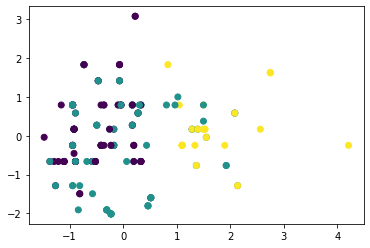

In [277]:
# Gráfico com o resultados dos clusters criados
plt.cla()
plt.scatter(predPd[3], predPd[4], c = predPd[0])

# Capítulo 9.11: Spark MLLib - Sistema de Recomendação

## <font color='blue'>Spark MLLib - Sistema de Recomendação</font>

<strong> Descrição </strong>
<ul style="list-style-type:square">
  <li>Também chamado de filtros colaborativos.</li>
  <li>Analisa dados passados para compreender comportamentos de pessoas/entidades.</li>
  <li>A recomendação é feita por similaridade de comportamento.</li>
  <li>Recomendação baseada em usuários ou items.</li>
  <li>Algoritmos de Recomendação esperam receber os dados em um formato específico: [user_ID, item_ID, score].</li>
  <li>Score, também chamado rating, indica a preferência de um usuário sobre um item. Podem ser valores booleanos, ratings ou mesmo volume de vendas.</li>
</ul>

In [278]:
# Spark Session - usada quando se trabalha com Dataframes no Spark
spSession = SparkSession.builder.master("local").appName("DSA-SparkMLLib").config("spark.some.config.option", "session").getOrCreate()

In [279]:
from pyspark.ml.recommendation import ALS

In [280]:
# Carrega os dados no formato ALS (user, item, rating)
ratingsRDD = sc.textFile(r"09.11 Spark MLLib - Sistema de Recomendação\user-item.txt")
ratingsRDD.collect()

['1001,9001,10',
 '1001,9002,1',
 '1001,9003,9',
 '1002,9001,3',
 '1002,9002,5',
 '1002,9003,1',
 '1002,9004,10',
 '1003,9001,2',
 '1003,9002,6',
 '1003,9003,2',
 '1003,9004,9',
 '1003,9005,10',
 '1003,9006,8',
 '1003,9007,9',
 '1004,9001,9',
 '1004,9002,2',
 '1004,9003,8',
 '1004,9004,3',
 '1004,9010,10',
 '1004,9011,9',
 '1004,9012,8',
 '1005,9001,8',
 '1005,9002,3',
 '1005,9003,7',
 '1005,9004,1',
 '1005,9010,9',
 '1005,9011,10',
 '1005,9012,9',
 '1005,9013,8',
 '1005,9014,1',
 '1005,9015,1',
 '1006,9001,7',
 '1006,9002,4',
 '1006,9003,8',
 '1006,9004,1',
 '1006,9010,7',
 '1006,9011,6',
 '1006,9012,9']

In [282]:
# Convertendo as strings
ratingsRDD2 = ratingsRDD.map(lambda l: l.split(',')).map(lambda l:(int(l[0]), int(l[1]), float(l[2])))

In [283]:
# Criando um Dataframe
ratingsDF = spSession.createDataFrame(ratingsRDD2, ["user", "item", "rating"])

In [284]:
ratingsDF.show()

+----+----+------+
|user|item|rating|
+----+----+------+
|1001|9001|  10.0|
|1001|9002|   1.0|
|1001|9003|   9.0|
|1002|9001|   3.0|
|1002|9002|   5.0|
|1002|9003|   1.0|
|1002|9004|  10.0|
|1003|9001|   2.0|
|1003|9002|   6.0|
|1003|9003|   2.0|
|1003|9004|   9.0|
|1003|9005|  10.0|
|1003|9006|   8.0|
|1003|9007|   9.0|
|1004|9001|   9.0|
|1004|9002|   2.0|
|1004|9003|   8.0|
|1004|9004|   3.0|
|1004|9010|  10.0|
|1004|9011|   9.0|
+----+----+------+
only showing top 20 rows



In [285]:
# Construindo o modelo
# ALS = Alternating Least Squares --> Algoritmo para sistema de recomendação, que otimiza a loss function 
# e funciona muito bem em ambientes paralelizados
als = ALS(rank = 10, maxIter = 5)
modelo = als.fit(ratingsDF)

In [286]:
# Visualizando o Affinity Score
modelo.userFactors.orderBy("id").collect()

[Row(id=1001, features=[-1.020338773727417, 0.15884457528591156, 0.43435177206993103, 0.42108067870140076, -0.08316300064325333, -0.22315619885921478, 0.43449509143829346, -0.016361376270651817, -0.09652017056941986, 1.2523633241653442]),
 Row(id=1002, features=[-0.7278647422790527, -0.3039030432701111, -1.4372807741165161, 0.4101669490337372, -0.20219333469867706, 0.30689162015914917, 0.2394382208585739, -0.31496909260749817, -0.42265287041664124, -0.5618031024932861]),
 Row(id=1003, features=[-0.2754066288471222, -0.02016931213438511, -1.2622171640396118, 0.6222057938575745, -0.3387295603752136, 0.6792862415313721, -0.059917986392974854, 0.23600462079048157, -0.24518680572509766, -0.4790261387825012]),
 Row(id=1004, features=[-1.1808589696884155, -0.198384091258049, 0.1094837412238121, 0.714041531085968, -0.03430582955479622, -0.05891014635562897, 0.40418773889541626, -0.05229669436812401, -0.19879166781902313, 0.6823390126228333]),
 Row(id=1005, features=[-0.520517110824585, 0.53832

In [287]:
# Criando um dataset de teste com usuários e items para rating
testeDF = spSession.createDataFrame([(1001, 9003),(1001,9004),(1001,9005)], ["user", "item"])

In [288]:
# Previsões  
# Quanto maior o Affinity Score, maior a probabilidade do usuário aceitar uma recomendação
previsoes = (modelo.transform(testeDF).collect())
previsoes

[Row(user=1001, item=9004, prediction=-0.6660881042480469),
 Row(user=1001, item=9005, prediction=-2.7070765495300293),
 Row(user=1001, item=9003, prediction=9.008316993713379)]